# **Telecom Customer Churn Prediction**

## **Import Libraries**

In [1]:
#Import necessary libararies
import pandas as pd
import numpy as np

#Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# train_test_split is used to divide the dataset into Training data (for learning) and Testing data (for checking accuracy)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler # StandardScaler helps to scale/normalize numerical values so that no feature dominates others because of larger numbers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # confusion_matrix shows correct vs wrong predictions in table format
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier builds a tree-like structure to make decisions and predict churn
from sklearn.ensemble import RandomForestClassifier # StandardScaler helps to scale/normalize numerical values so that no feature dominates others because of larger numbers

import random  # Python's built-in random library
import tensorflow as tf  # <-- must import TensorFlow


In [2]:
#What to look for:

#If some columns are text that should be numbers
#Any negative or unrealistic values (e.g., “Age = -2”)
#Any strange symbols or inconsistent data

In [3]:
# adding csv file
df_churn = pd.read_csv("telecom_customer_churn.csv")
df_churn.head()#check first 5 rows.

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


### **Import and Install xgboost**

In [4]:
!pip install xgboost

In [5]:
from xgboost import XGBClassifier


In [6]:
#XGBoost stands for Extreme Gradient Boosting
#XGBoost is used to build a high-performance, accurate model for predicting customer churn by efficiently handling large datasets and complex feature interactions.

## **Exploratory Data Analysis (EDA)**

#### **Basic Information about Data Set** 

In [7]:
#check what are the column names, are, data type of thier values and check the non-null value count.
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [8]:
df_churn.shape

(7043, 38)

In [9]:
#7043 Rows - the number of records or customers in your dataset
#38 Columns - the number of features or variables

In [10]:
#Non-null count = total rows that have valid (non-missing) values.

In [11]:
#example :CustomerID → 7043 non-null → ✅ all 7043 rows have data (no missing values).
#TotalCharges → 7032 non-null → ❌ 11 rows are missing (7043 - 7032 = 11).

#Object (string) → categorical data (needs encoding).
#nt64/float64 → numerical data.

#### **Missing Values Check** 

In [12]:
#Checking how much null values in each columns
#null values count = total rows - non null count
df_churn.isnull().sum()



Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  


I checked the null values of every column. Most columns haven't null values.Now I need to get only null values including columns only in a descending order for get a clear understanding about data set. 

In [13]:
#for getting only null values > 0
missing_values = df_churn.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Churn Reason                         5174
Churn Category                       5174
Offer                                3877
Online Backup                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Streaming Movies                     1526
Streaming TV                         1526
Unlimited Data                       1526
Streaming Music                      1526
Internet Type                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
dtype: int64


According to this data set, **Offer, Churn Category** and **Churn Reason** columns have most null values than others and I need to exclude that columns in **Data Preprocessing** part.

In [14]:
df_churn.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [15]:
value_count_of_Customer_Status_col = df_churn["Customer Status"]. value_counts()
print("Value Count of Customer Status Column are :\n", value_count_of_Customer_Status_col)

Value Count of Customer Status Column are :
 Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64


In [16]:
Total_value_count_of_Customer_Status_col = sum(df_churn["Customer Status"]. value_counts())
print("Total Value Count of Customer Status Column are :\n", Total_value_count_of_Customer_Status_col)

Total Value Count of Customer Status Column are :
 7043


**Distribution of Customer Status**

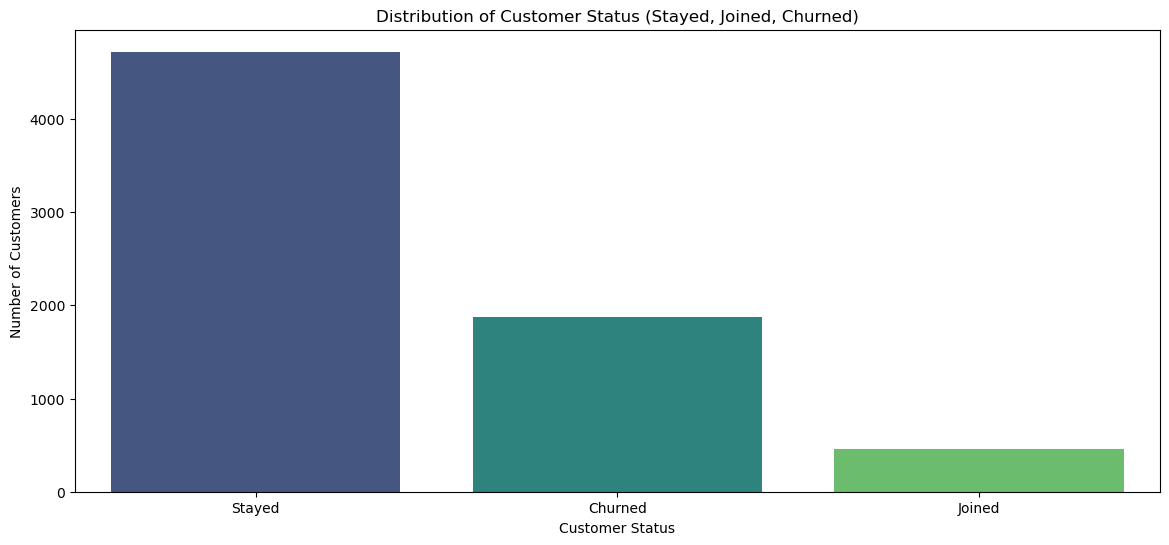

In [17]:
plt.figure(figsize=(14,6))
sns.countplot(
    data=df_churn,
    x="Customer Status",
    hue="Customer Status",
    order=df_churn["Customer Status"].value_counts().index,
    palette="viridis",
    legend=False  
)

plt.title("Distribution of Customer Status (Stayed, Joined, Churned)")
plt.xlabel("Customer Status")
plt.ylabel("Number of Customers")
plt.show()

Now I need to the binary classification and i need to drop **joined** class. because joined people amount less than other two groups. look like 5% from all. and I need to drop  that in the **Data Preprocessing** part.

#### **Check for Duplicates** 

In [18]:
#Check for Duplicates
duplicates = df_churn.duplicated().sum()
print(f"Duplicates are : {duplicates}")

Duplicates are : 0


In [19]:
df_churn.shape

(7043, 38)

In [20]:
summary_of_statictics = df_churn.describe()
display(summary_of_statictics)
#we want the chart, because why we use display not print.

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [21]:
#summary stats for numeric columns(mean,median,std,min,max Q1,Q2,Q3)

**Churn Distribution by Contract Type**

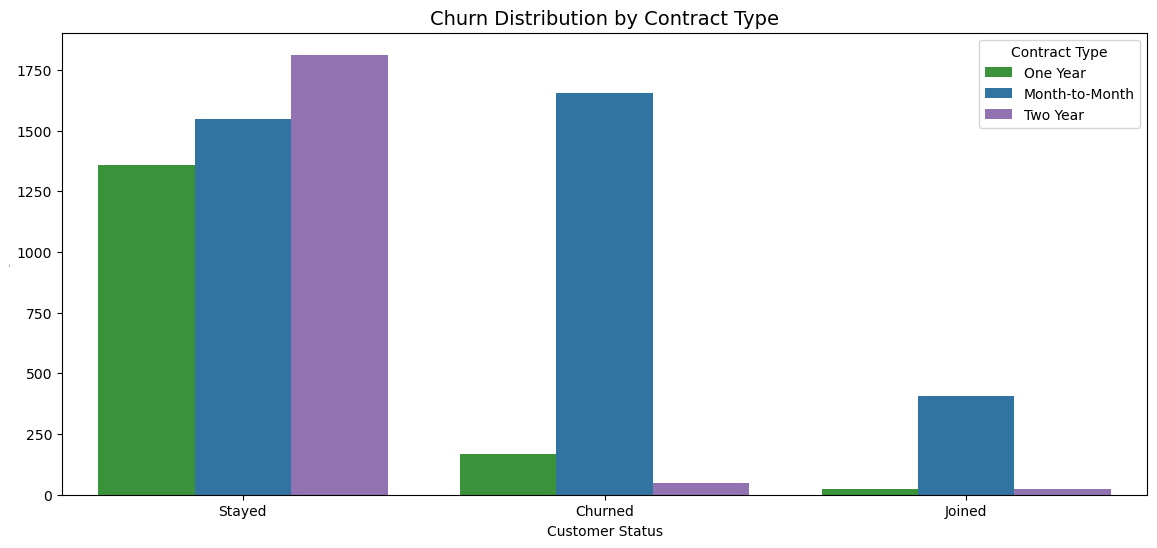

In [22]:
#Churn Distribution by Contract Type and Counts.
plt.figure(figsize=(14,6))
sns.countplot(x='Customer Status', hue = 'Contract', data= df_churn, palette={'Month-to-Month': '#1f77b4', 'One Year': '#2ca02c', 'Two Year': '#9467bd'} )
plt.title('Churn Distribution by Contract Type', fontsize=14)
plt.ylabel('Count', fontsize=1)
plt.legend(title='Contract Type')
plt.show()


*According to this chart, we can see most of Month to Month contract type customers try to churn*

**Churn Distribution by Age Group**

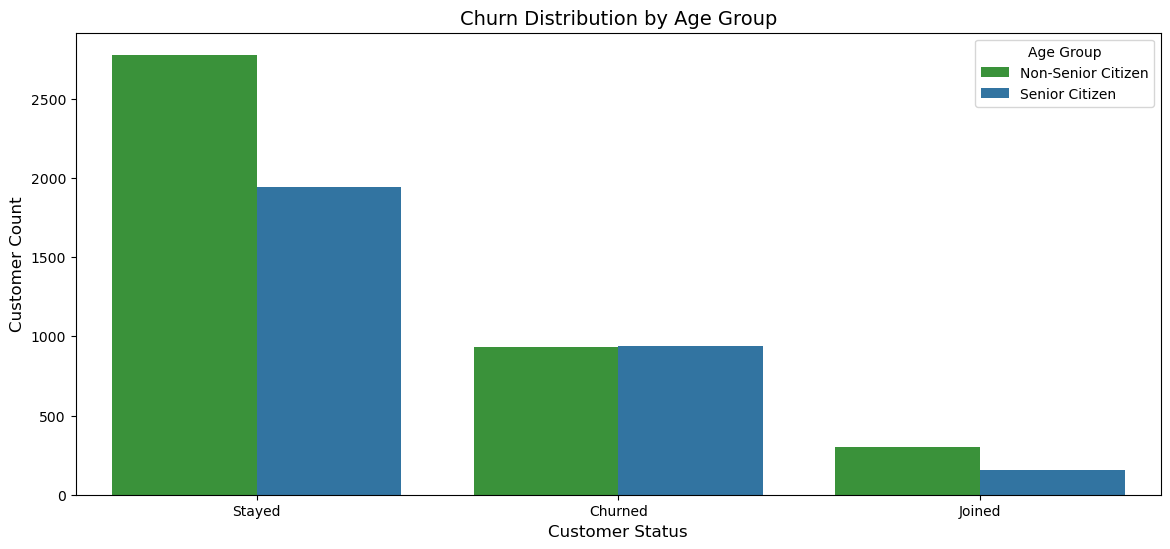

In [23]:
# Step 1: Create a new column for Age Group (without lambda)
df_churn.loc[df_churn['Age'] >= 50, 'Age Group'] = 'Senior Citizen'
df_churn.loc[df_churn['Age'] < 50, 'Age Group'] = 'Non-Senior Citizen'

# Step 2: Plot the countplot
plt.figure(figsize=(14, 6))
sns.countplot(
    x='Customer Status',
    hue='Age Group',
    data=df_churn,
    palette={'Senior Citizen': '#1f77b4','Non-Senior Citizen': '#2ca02c'})

plt.title('Churn Distribution by Age Group', fontsize=14)
plt.xlabel('Customer Status', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.legend(title='Age Group')
plt.show()

*According to this chart, we can see most of Senior Citizen customers try to churn.*

In [24]:
df_churn.shape

(7043, 39)

In the last step, I added a new column named **'Age Group'**, and now we have 39 columns because of it.

**Churn Distribution by Monthly Charge and Counts**

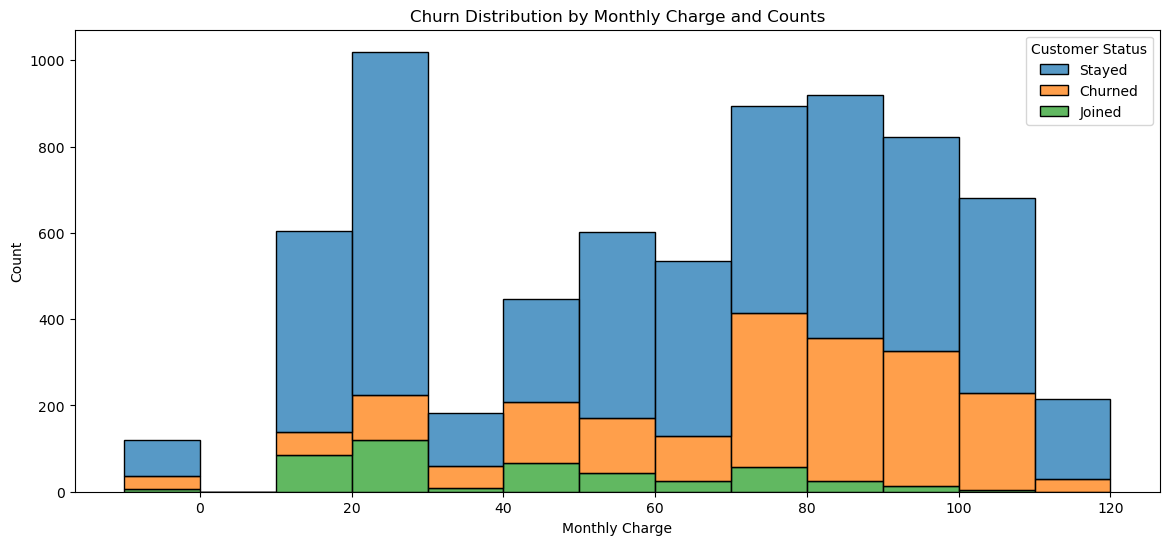

In [25]:
#Churn Distribution by Monthly Charge and Counts and Counts.
bins = np.arange(df_churn['Monthly Charge'].min(), #Finds the smallest value in the Monthly Charge column.
                 df_churn['Monthly Charge'].max() + 10, 10)#Finds the largest value in the column and Creates a list of numbers starting from start, up to but not including stop, with steps of step.

plt.figure(figsize=(14,6))
sns.histplot(x='Monthly Charge',hue = 'Customer Status', multiple='stack', bins=bins, data=df_churn)
plt.title('Churn Distribution by Monthly Charge and Counts')
plt.show()



**Churn Distribution by Total Charges and Counts**

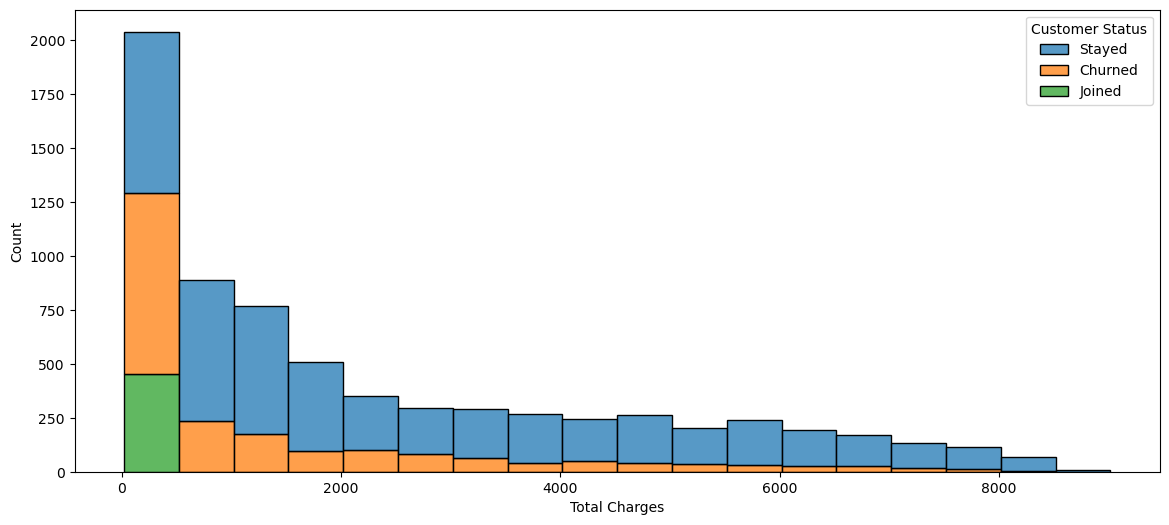

In [26]:
#Churn Distribution by Total Charges and Counts
bins = np.arange(df_churn['Total Charges'].min(),
                 df_churn['Total Charges'].max() + 500, 500)# 500 gap for each bin

plt.figure(figsize=(14,6))
sns.histplot(x='Total Charges',hue = 'Customer Status', multiple='stack',bins = bins, data=df_churn)
plt.title('')
plt.show()


*According to this chart, we can see the customers, who payed less than 4000 as a Total charge for a month try to churn.*

**Churn Distribution by Tenure and Counts**

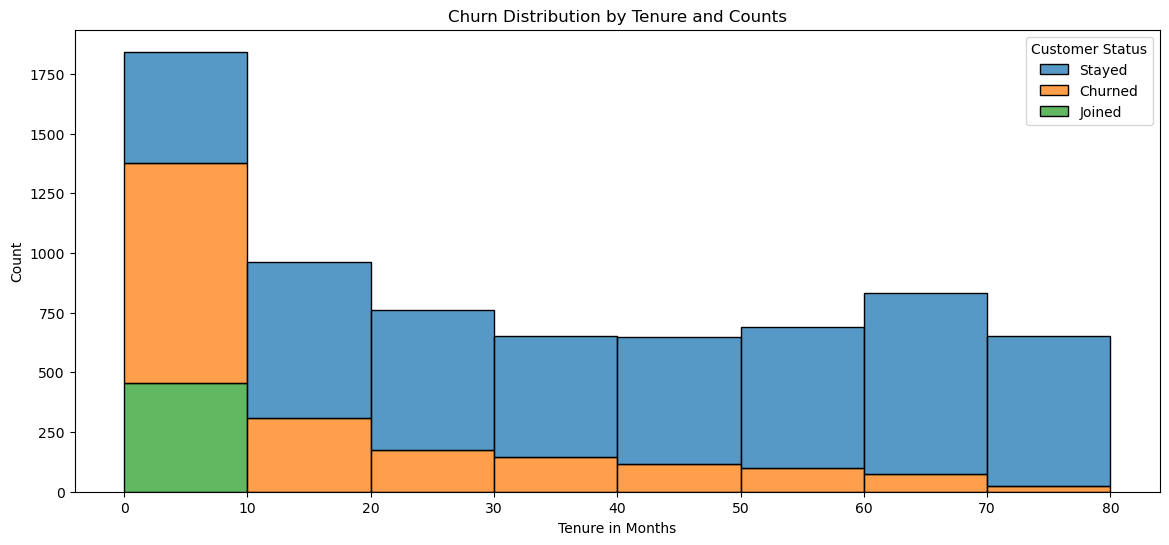

In [27]:
#Churn Distribution by Tenure and Counts

#Define bins specifically for Total Charges
bins = np.arange(0, df_churn['Tenure in Months'].max() + 10,10)  # Force the bins to start at 0 explicitly,
#10 gap for each bin

plt.figure(figsize=(14,6))
sns.histplot(x='Tenure in Months', hue = 'Customer Status', multiple='stack',bins = bins, data=df_churn)
plt.title('Churn Distribution by Tenure and Counts')
plt.show()





*According to this chart, we can see that customers who have stayed with the company for less than 40–50 months are more likely to churn.*

**According to all the chart distributions, if a customer is on a month-to-month contract, is a non-senior citizen, pays less than 4000 per month in total charges, and has stayed with the company for less than 40–50 months, we can predict that they are likely to churn.**

**Distribution of Internet Type**

In [28]:
value_count_of_internet_type_col = df_churn["Internet Type"]. value_counts()
print("Value Count of Internet Type Column are :\n", value_count_of_internet_type_col)

Value Count of Internet Type Column are :
 Internet Type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64


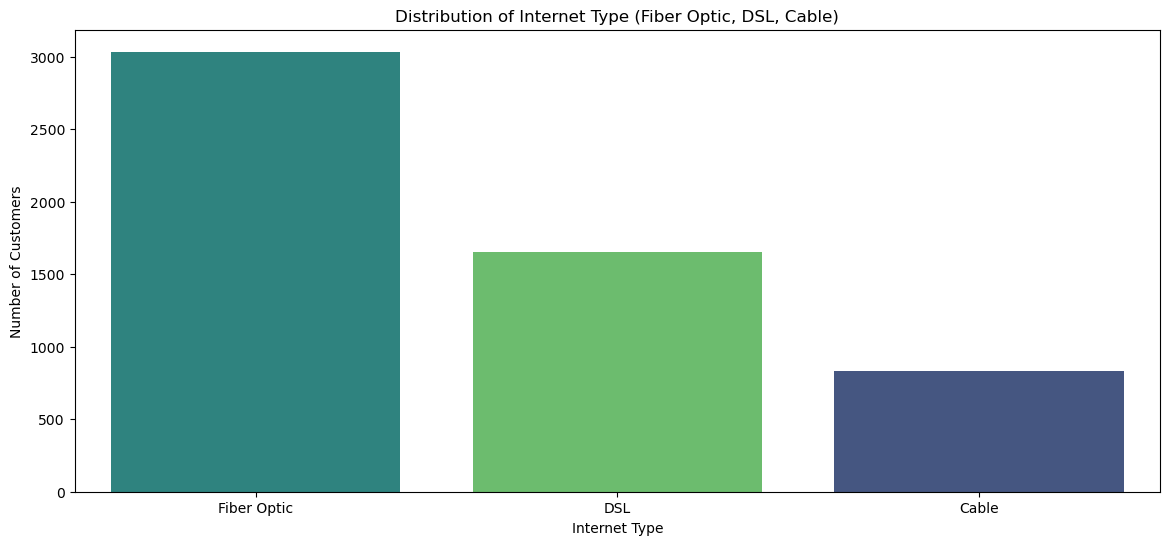

In [29]:
plt.figure(figsize=(14,6))
sns.countplot(
    data=df_churn,
    x="Internet Type",
    hue="Internet Type",
    order=df_churn["Internet Type"].value_counts().index,
    palette="viridis",
    legend=False  
)

plt.title("Distribution of Internet Type (Fiber Optic, DSL, Cable)")
plt.xlabel("Internet Type")
plt.ylabel("Number of Customers")
plt.show()

**Distribution of Contract**

In [30]:
value_count_of_contract_col = df_churn["Contract"]. value_counts()
print("Value Count of Contract Column are :\n", value_count_of_contract_col)

Value Count of Contract Column are :
 Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64


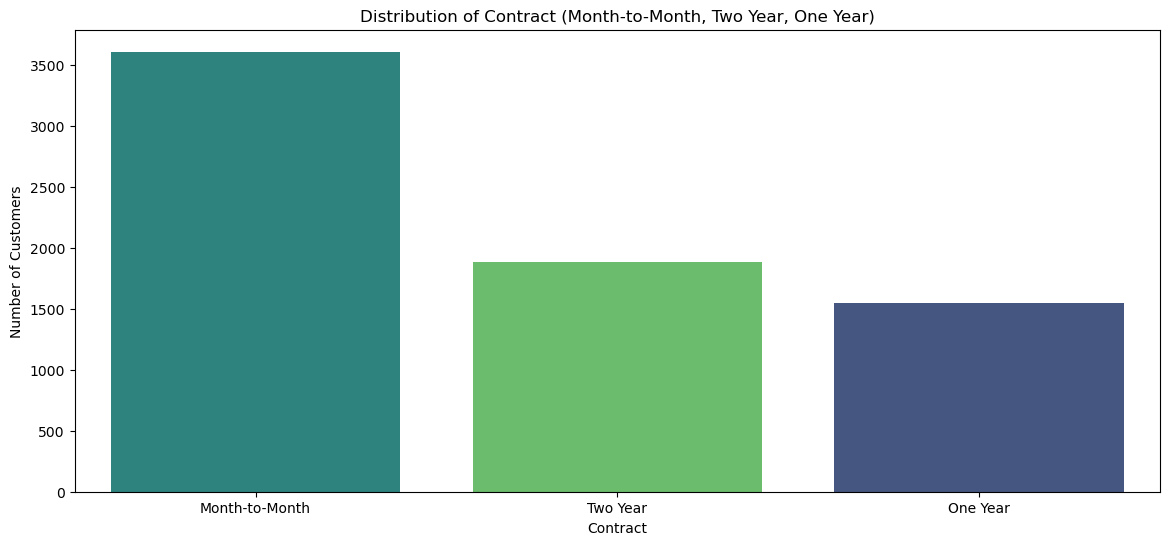

In [31]:
plt.figure(figsize=(14,6))
sns.countplot(
    data=df_churn,
    x="Contract",
    hue="Contract",
    order=df_churn["Contract"].value_counts().index,
    palette="viridis",
    legend=False  
)

plt.title("Distribution of Contract (Month-to-Month, Two Year, One Year)")
plt.xlabel("Contract")
plt.ylabel("Number of Customers")
plt.show()

**Distribution of Payment Method**

In [32]:
value_count_of_payment_method_col = df_churn["Payment Method"]. value_counts()
print("Value Count of Payment Method Column are :\n", value_count_of_payment_method_col)

Value Count of Payment Method Column are :
 Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64


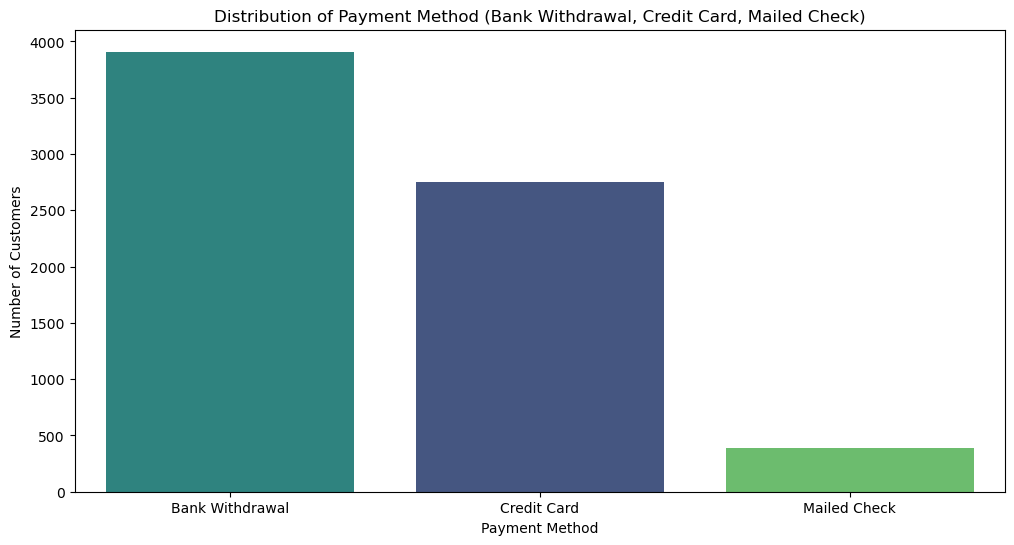

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_churn,
    x="Payment Method",
    hue="Payment Method",
    order=df_churn["Payment Method"].value_counts().index,
    palette="viridis",
    legend=False  
)

plt.title("Distribution of Payment Method (Bank Withdrawal, Credit Card, Mailed Check)")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.show()

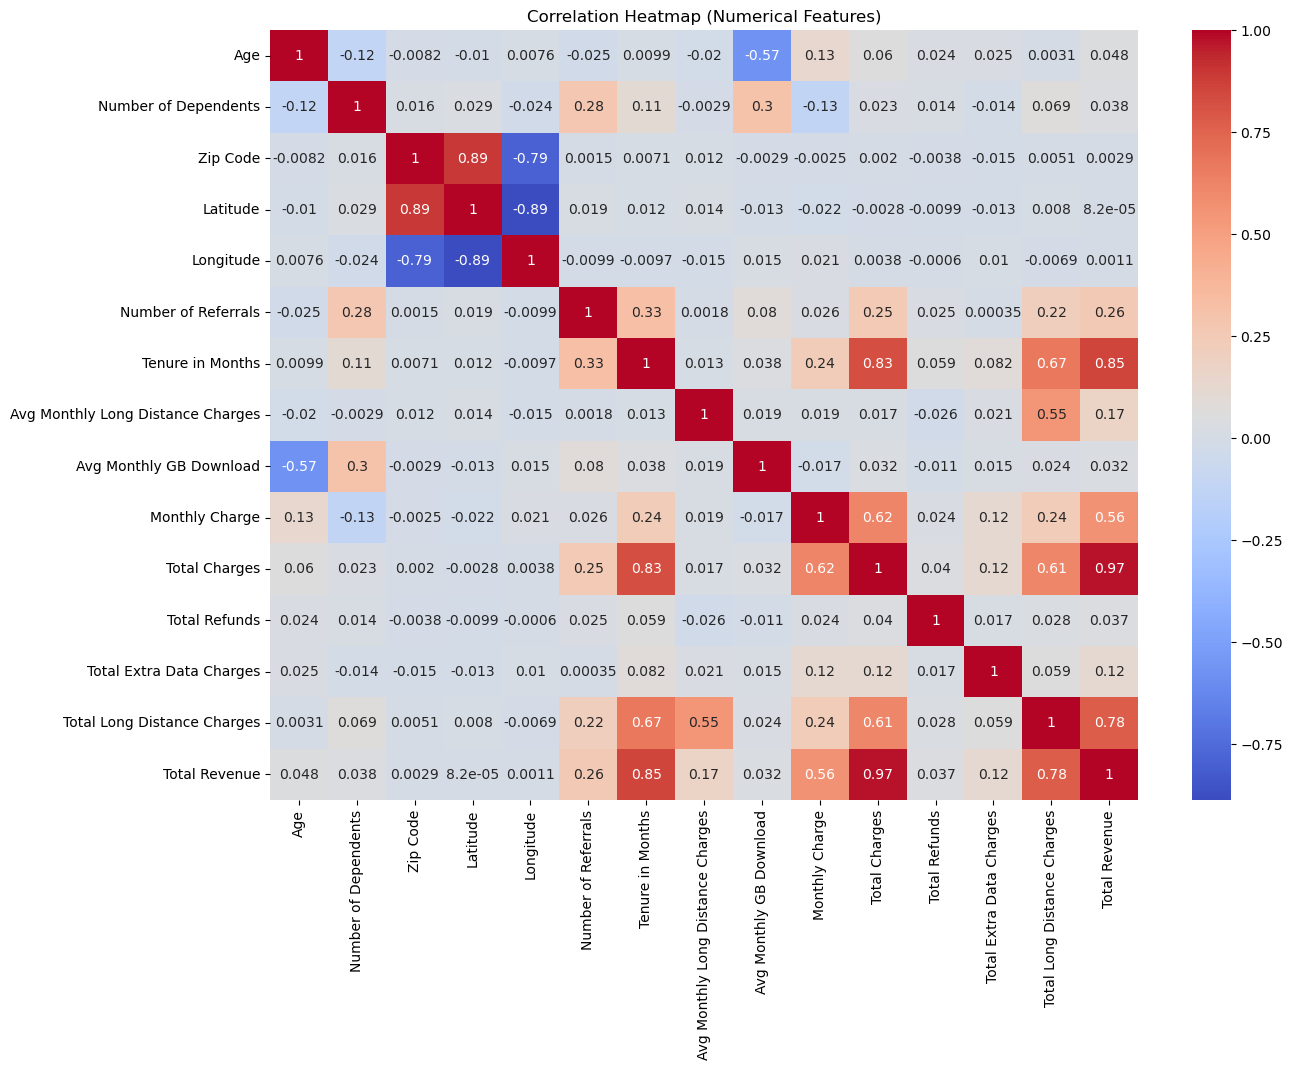

In [34]:
#Correlation Heatmap (Numerical Features)
plt.figure(figsize=(14,10))
sns.heatmap(df_churn.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

**Columns with correlation > 0.5 or < -0.5** → check for redundancy (possible drop candidate)

**Columns with correlation between -0.5 and +0.5** → safe and useful

In [35]:
df_churn[['Customer Status', 'Contract']].head()


,Customer Status,Contract
0,Stayed,One Year
1,Stayed,Month-to-Month
2,Churned,Month-to-Month
3,Churned,Month-to-Month
4,Churned,Month-to-Month


## **Data Preprocessing**

#### **Dataset Information**

df_churn.info()

In [36]:
df_churn.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason',
       'Age Group'],
      dtype='object')

#### **Clean the data set**

In [37]:
df_churn.shape

(7043, 39)

In [38]:
df_churn_clean = df_churn.drop(columns = [ 'Offer', 'Churn Category', 'Churn Reason','Customer ID', 
 'City',])

**These three columns were removed because they contain over 70% missing values and describe churn after it has occurred, which could lead to data leakage in predictive modeling.**

In [39]:
df_churn_clean.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Age Group'],
      dtype='object')

In [40]:
df_churn_clean.head()

,Gender,Age,Married,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Phone Service,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Age Group
0,Female,37,Yes,0,93225,34.827662,-118.999073,2,9,Yes,...,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Non-Senior Citizen
1,Male,46,No,0,91206,34.162515,-118.203869,0,9,Yes,...,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Non-Senior Citizen
2,Male,50,No,0,92627,33.645672,-117.922613,0,4,Yes,...,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Senior Citizen
3,Male,78,Yes,0,94553,38.014457,-122.115432,1,13,Yes,...,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Senior Citizen
4,Female,75,Yes,0,93010,34.227846,-119.079903,3,3,Yes,...,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Senior Citizen


In [41]:
df_churn_clean.shape

(7043, 34)

Now I need to do the binary classification and i need to drop **joined** class. because joined people amount less than other 2. look like 5% from all. and I need to drop  that.

In [42]:
df_churn_clean_1= df_churn_clean[df_churn_clean["Customer Status"] != "Joined"].copy()

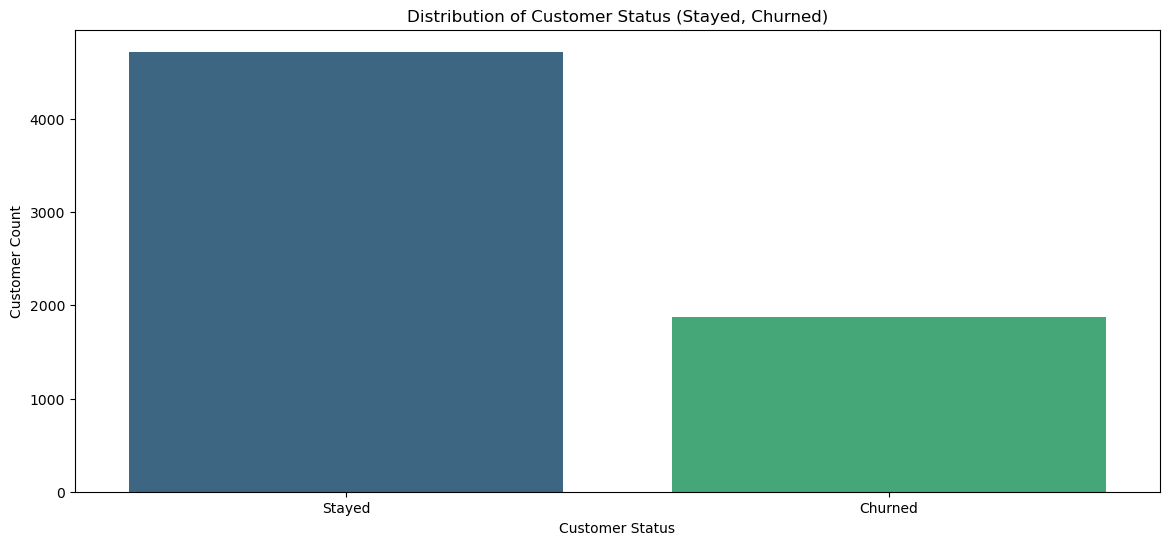

In [43]:
plt.figure(figsize=(14,6))
sns.countplot(
    data=df_churn_clean_1,
    x="Customer Status",
    hue="Customer Status",
    order=df_churn_clean_1["Customer Status"].value_counts().index,
    palette="viridis",
    legend=False  
)

plt.title("Distribution of Customer Status (Stayed, Churned)")
plt.xlabel("Customer Status")
plt.ylabel("Customer Count")
plt.show()

#### **Filling Missing Values** 

##### **Rule:  Always handle missing values before encoding categorical columns.**

In [44]:
finale_missing_values = df_churn_clean_1.isnull().sum().sort_values(ascending=False)
print("Finale Missing Values:\n", finale_missing_values[finale_missing_values > 0])

Finale Missing Values:
 Online Security                      1344
Avg Monthly GB Download              1344
Streaming Music                      1344
Unlimited Data                       1344
Online Backup                        1344
Device Protection Plan               1344
Internet Type                        1344
Streaming Movies                     1344
Streaming TV                         1344
Premium Tech Support                 1344
Multiple Lines                        644
Avg Monthly Long Distance Charges     644
dtype: int64


**Finale missing values after drop 'Offer', 'Churn Category', 'Churn Reason'columns and remove 'Joined'  columns.**

In [45]:
#Finale missing value percentages.
missing_values_percentage = (df_churn_clean_1.isnull().sum()[df_churn_clean_1.isnull().sum()> 0 ] / len(df_churn_clean_1)) * 100
print(missing_values_percentage)

Avg Monthly Long Distance Charges     9.773866
Multiple Lines                        9.773866
Internet Type                        20.397632
Avg Monthly GB Download              20.397632
Online Security                      20.397632
Online Backup                        20.397632
Device Protection Plan               20.397632
Premium Tech Support                 20.397632
Streaming TV                         20.397632
Streaming Movies                     20.397632
Streaming Music                      20.397632
Unlimited Data                       20.397632
dtype: float64


In [46]:
#select numerical columns
numerical_columns = df_churn_clean_1.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']


In [47]:
#select categorical columns
categorical_columns = df_churn_clean_1.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns: ", categorical_columns)

Categorical columns:  ['Gender', 'Married', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Age Group']


#### **Data Distribution**

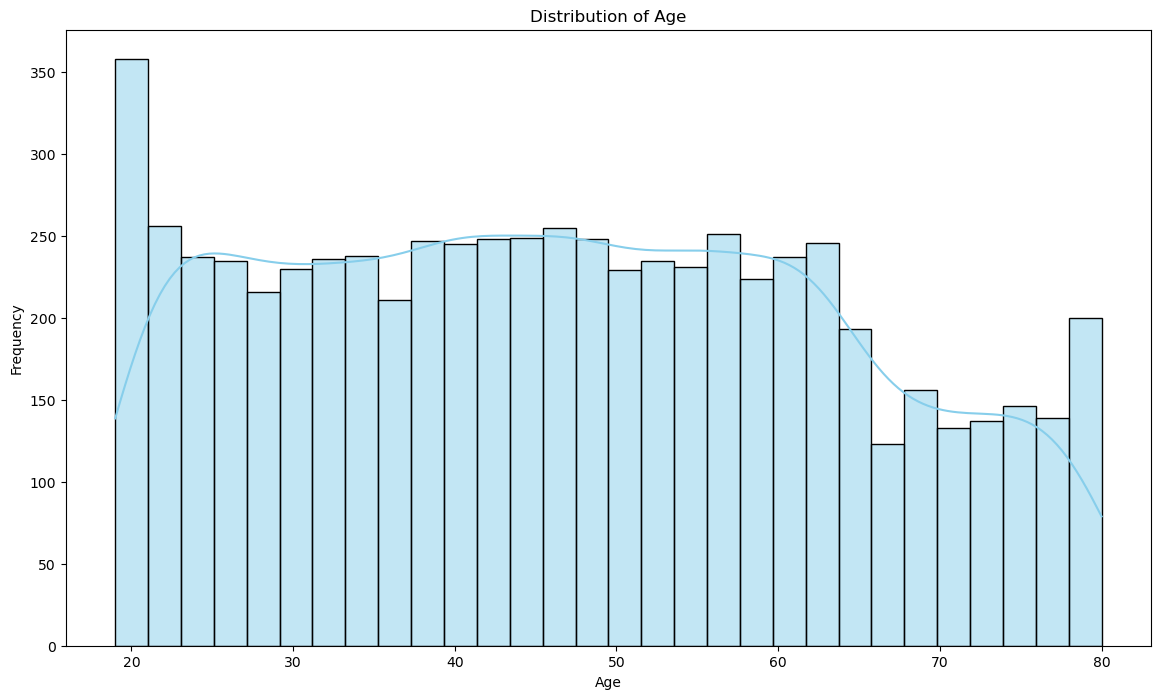

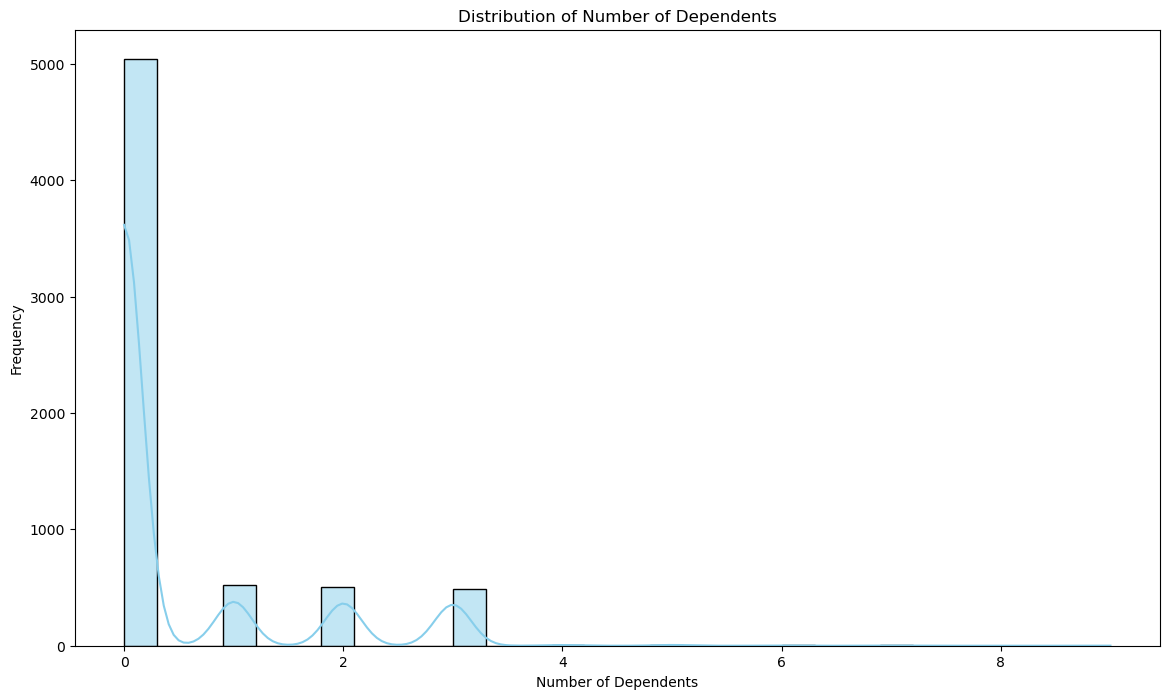

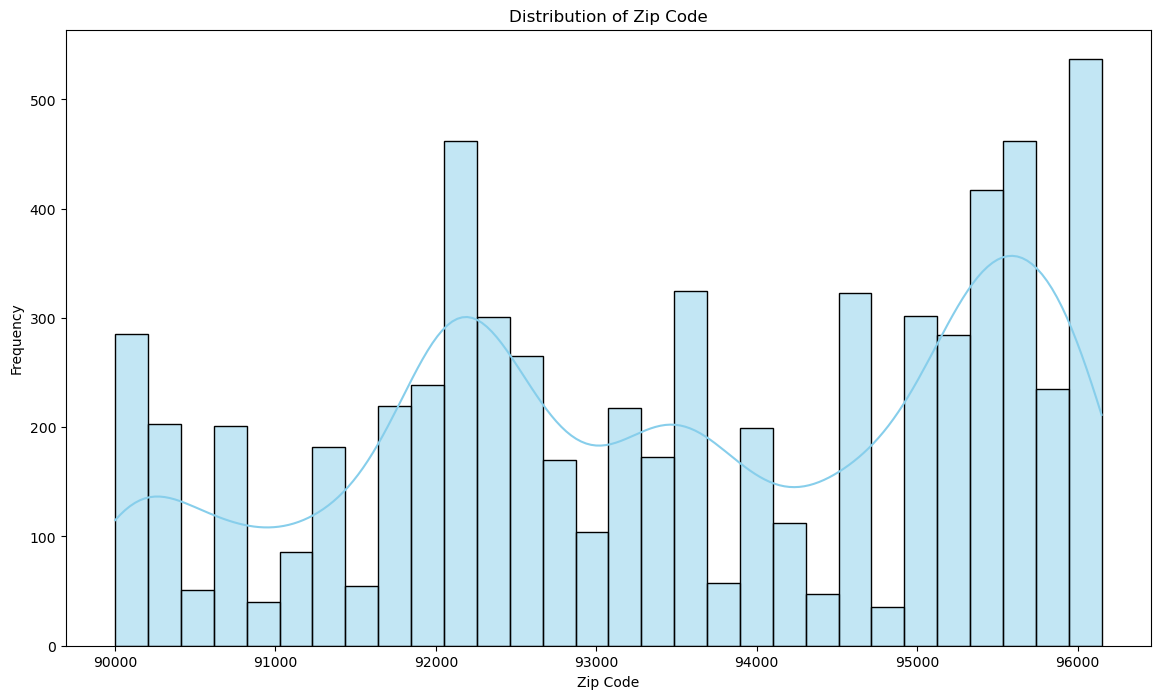

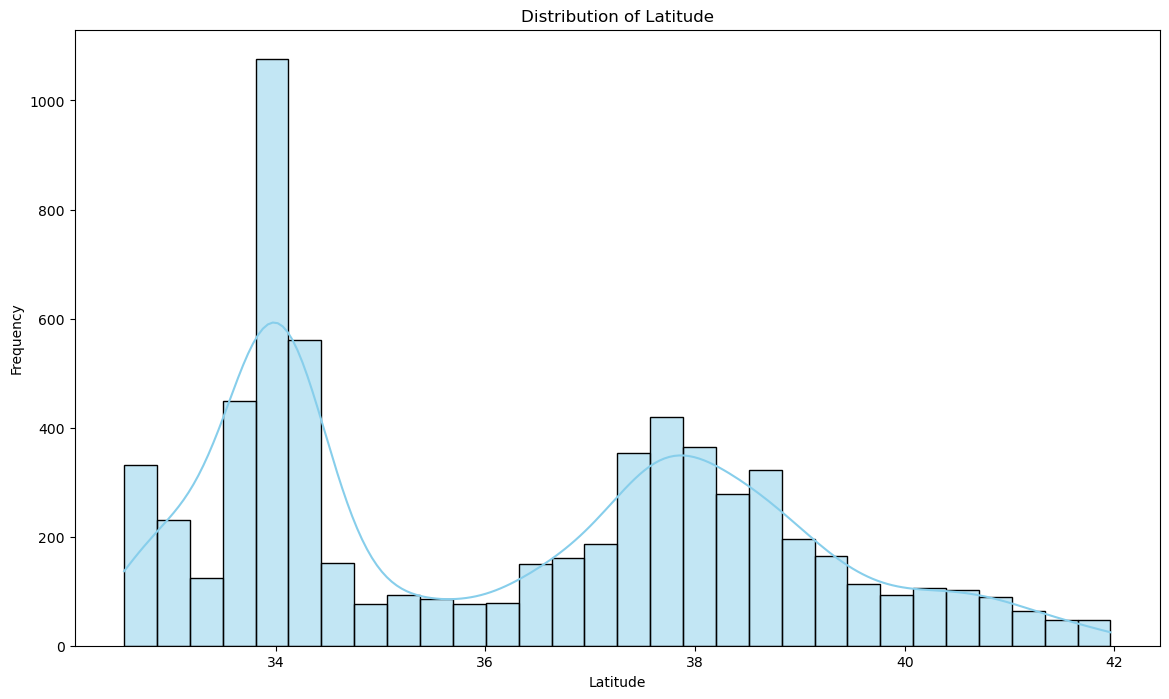

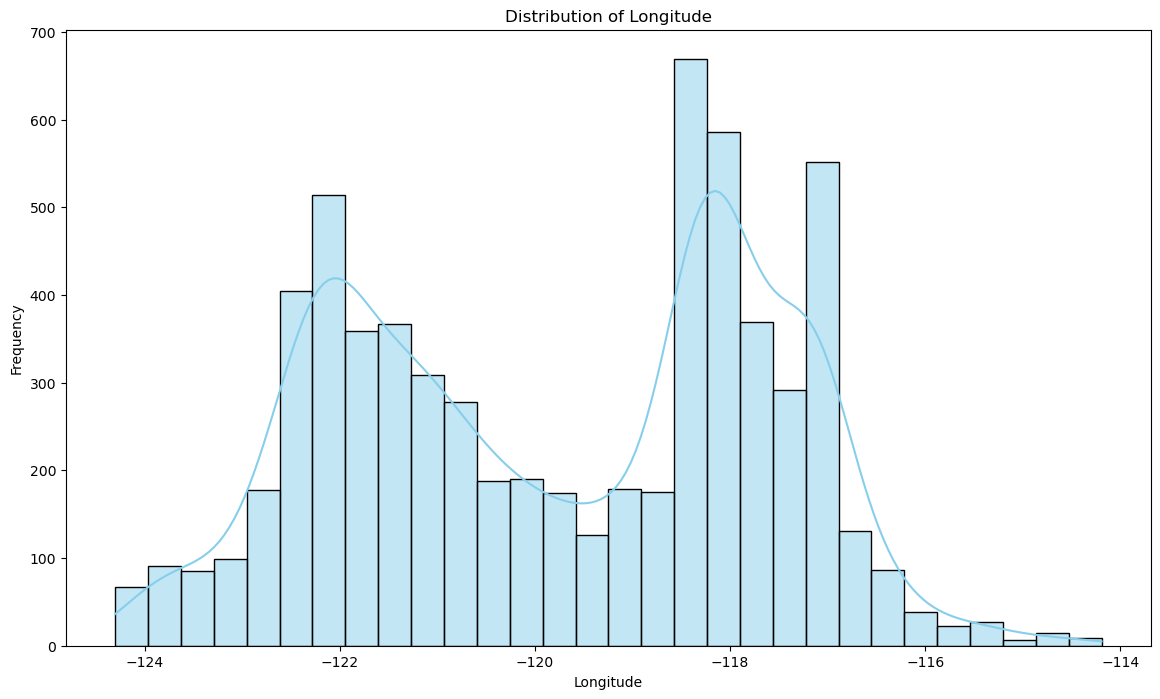

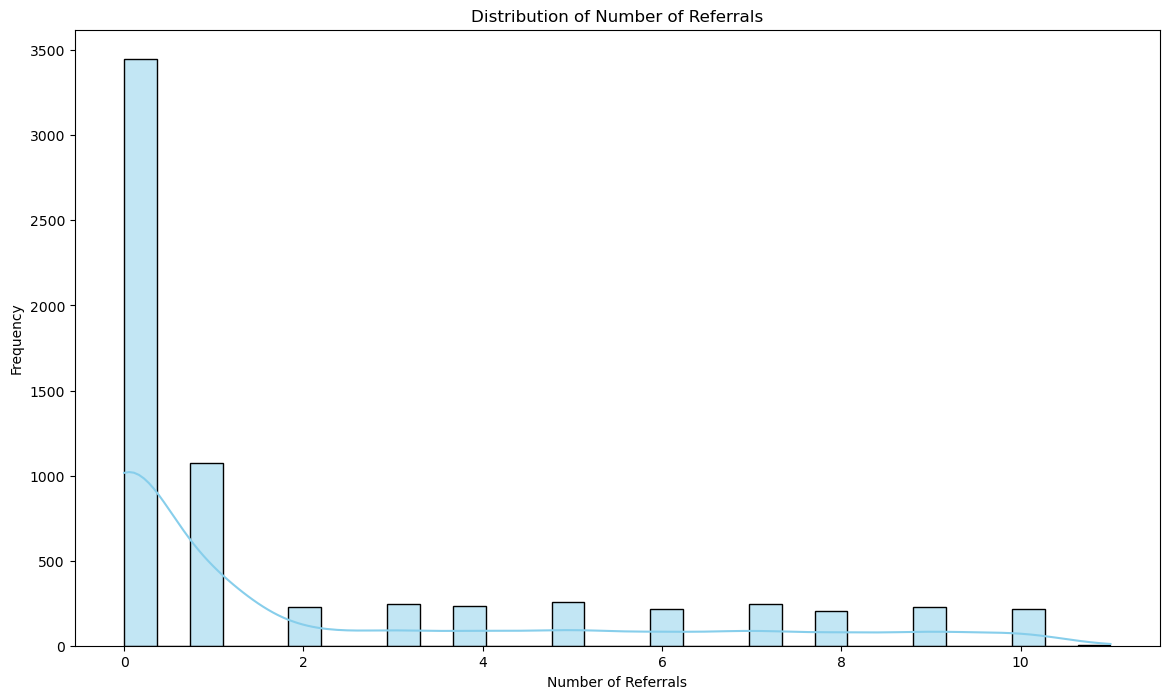

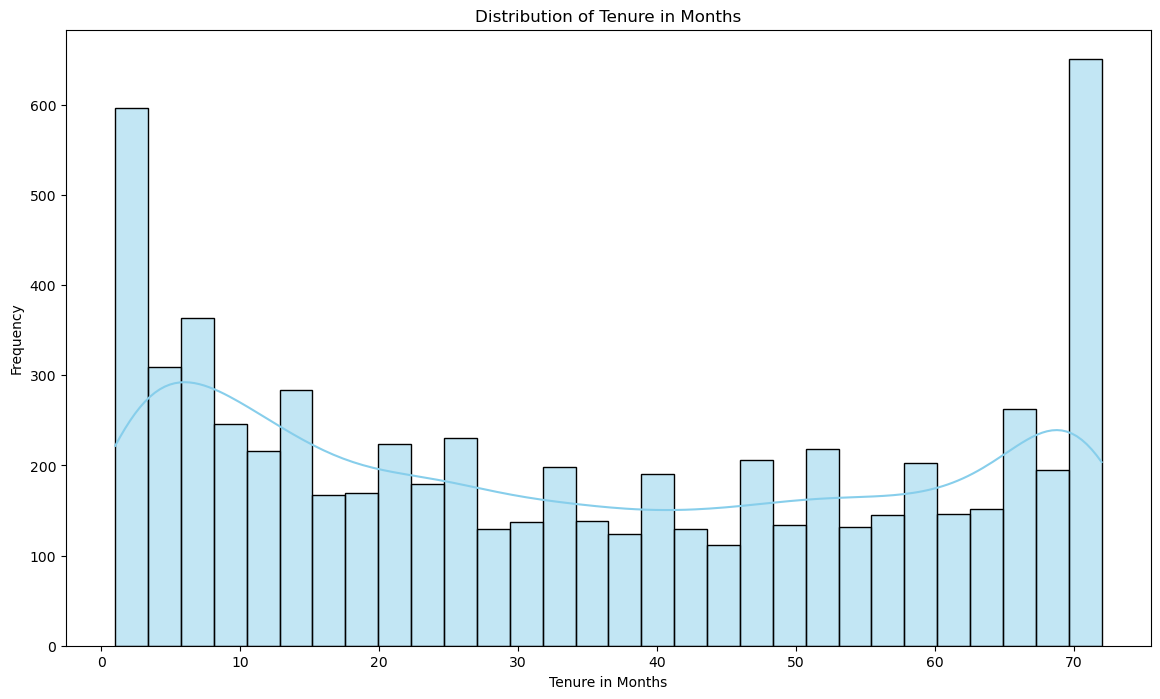

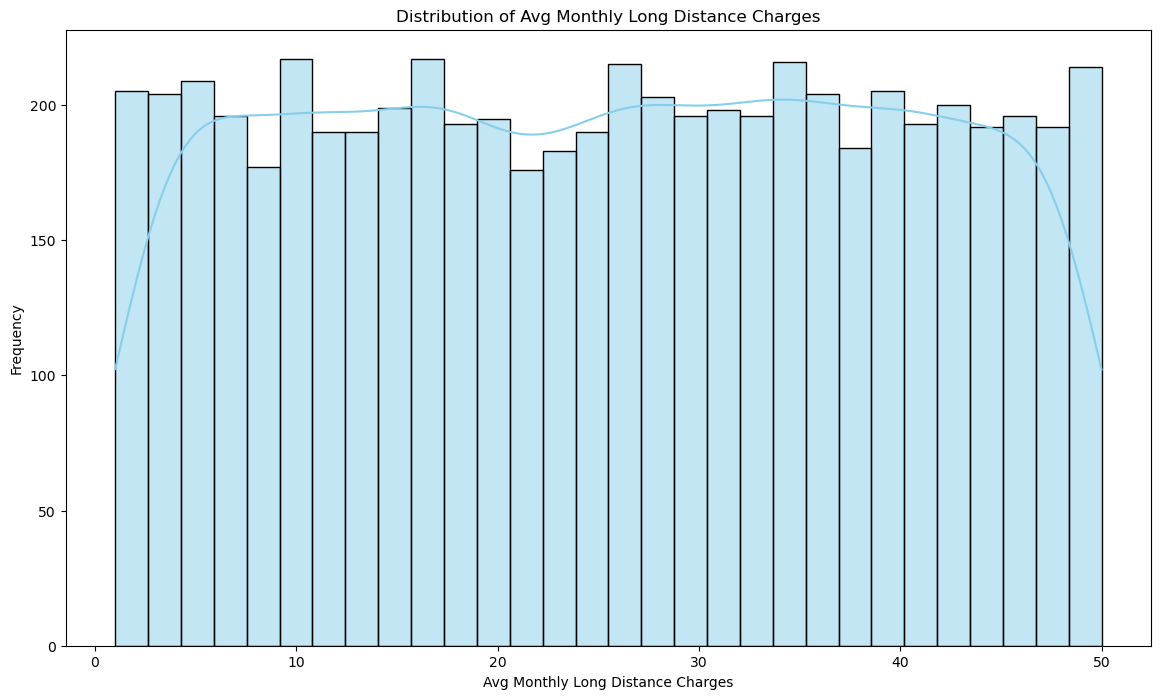

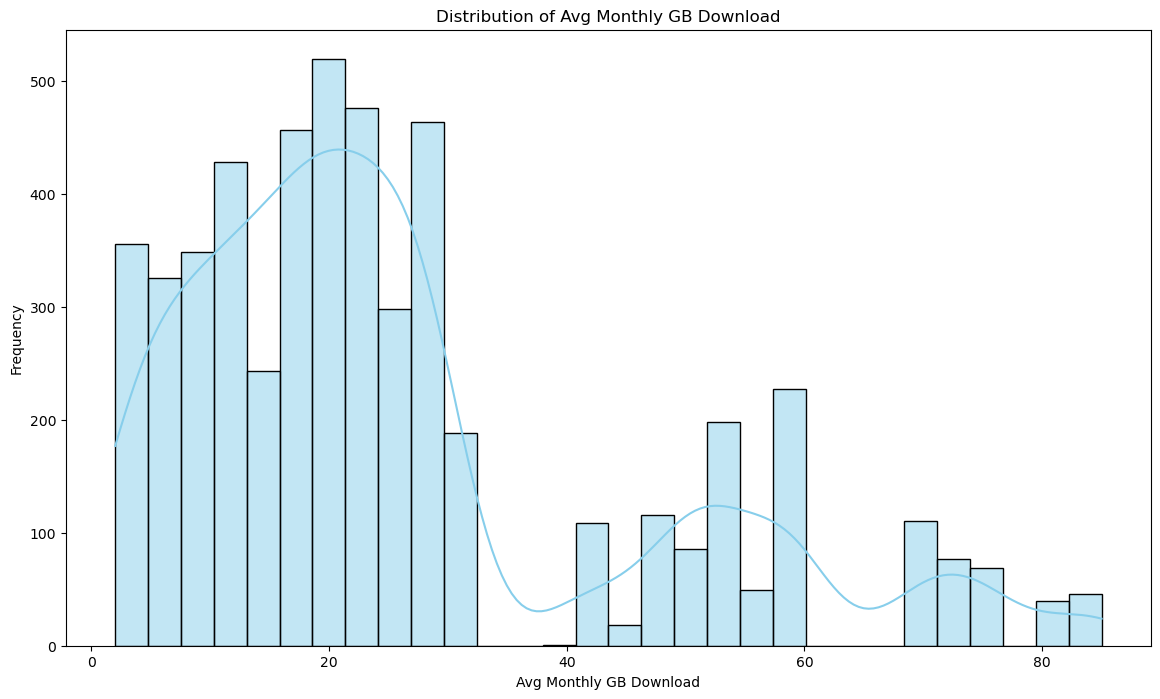

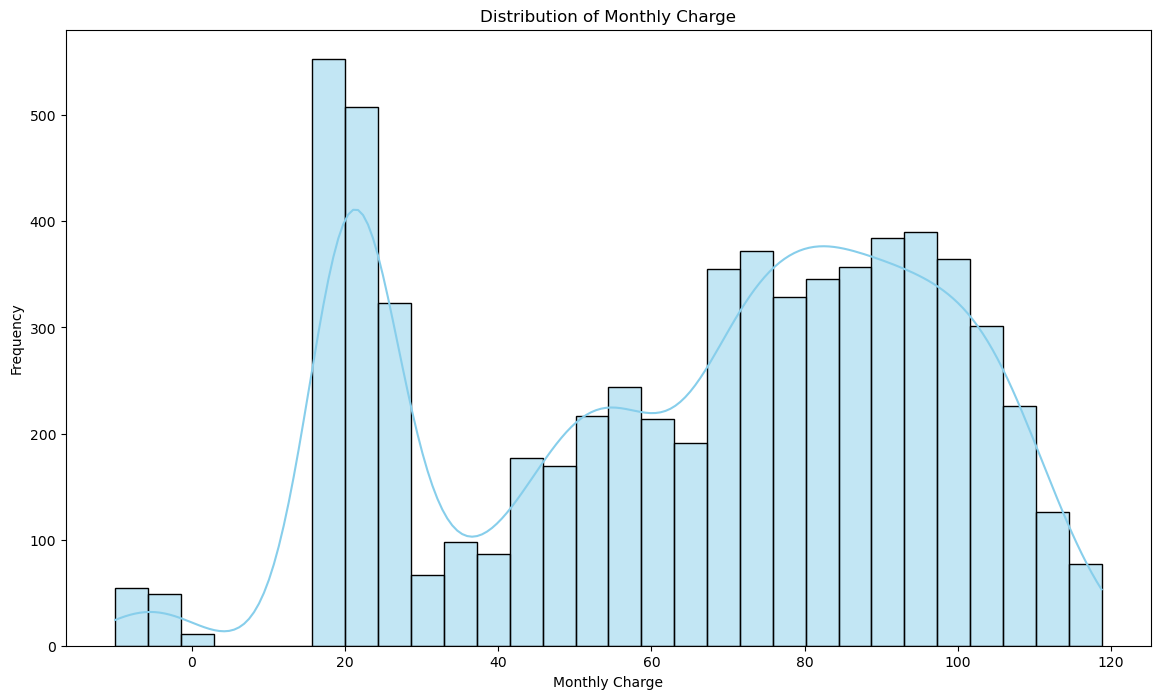

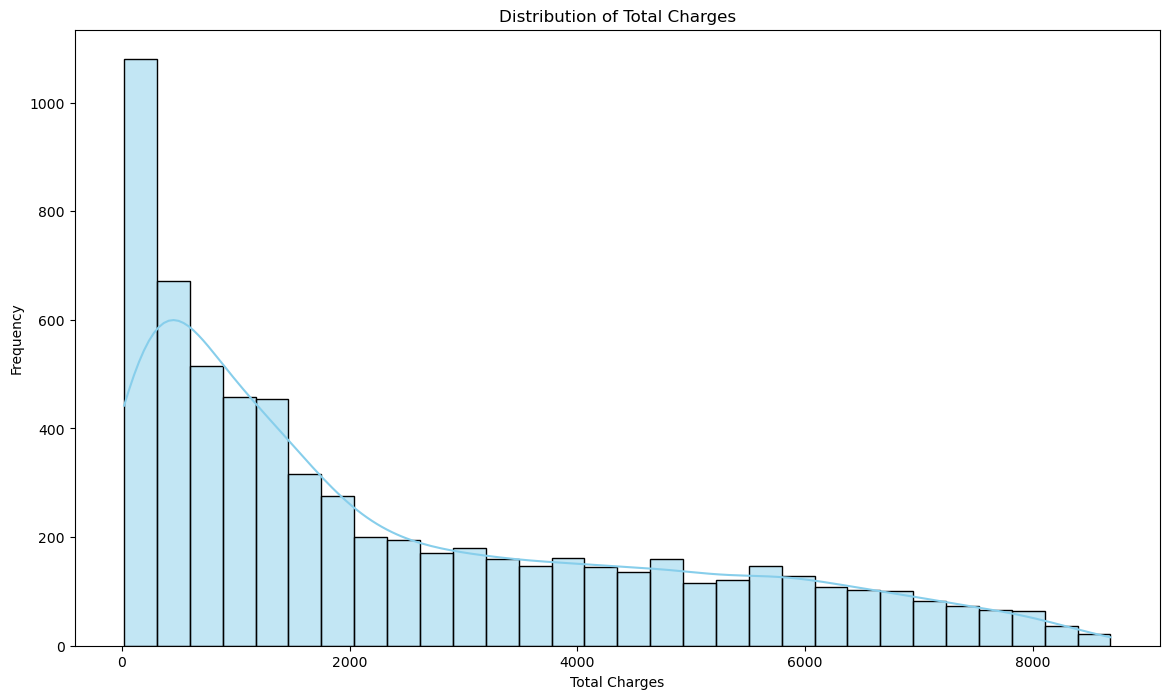

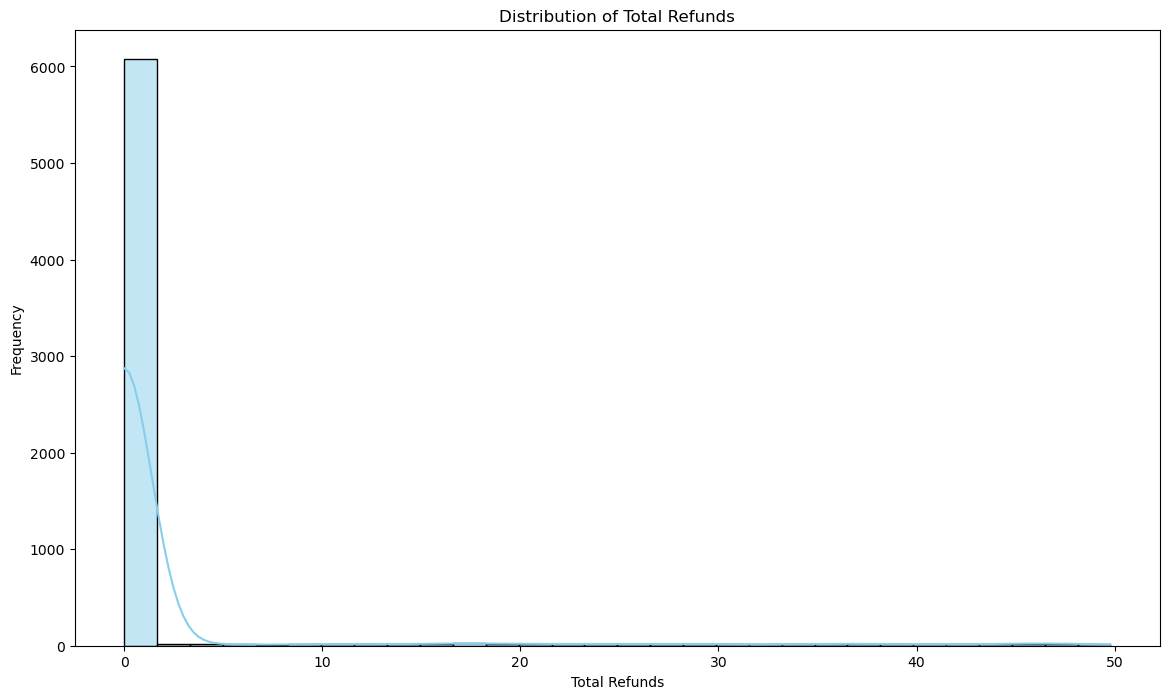

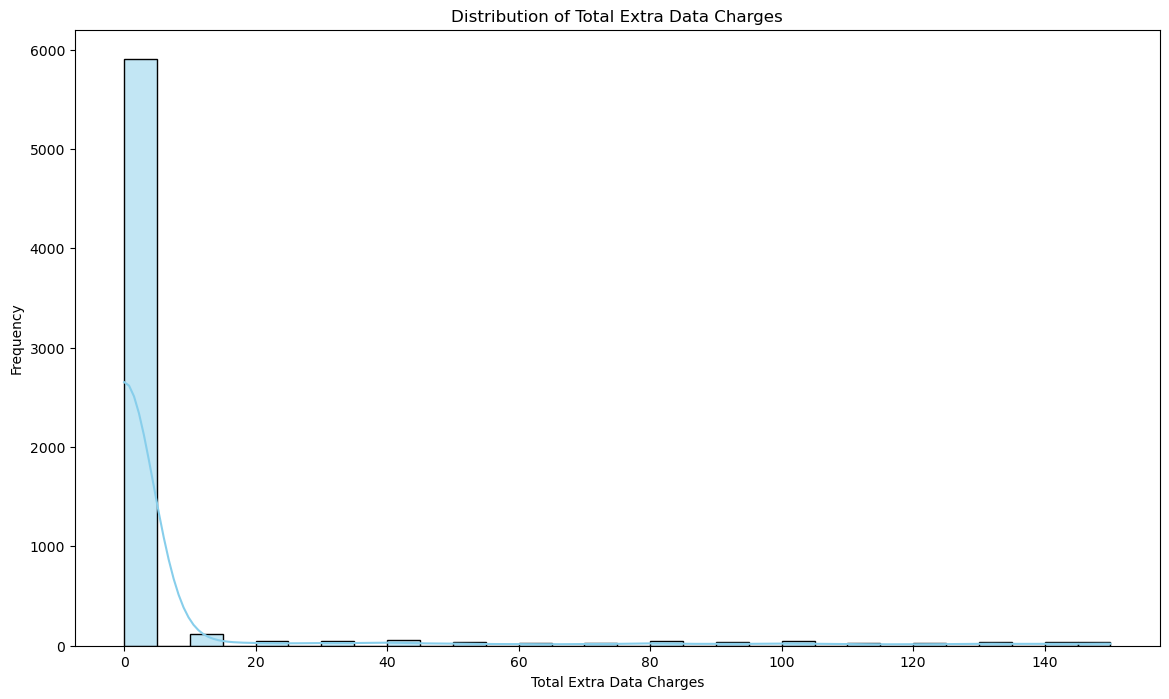

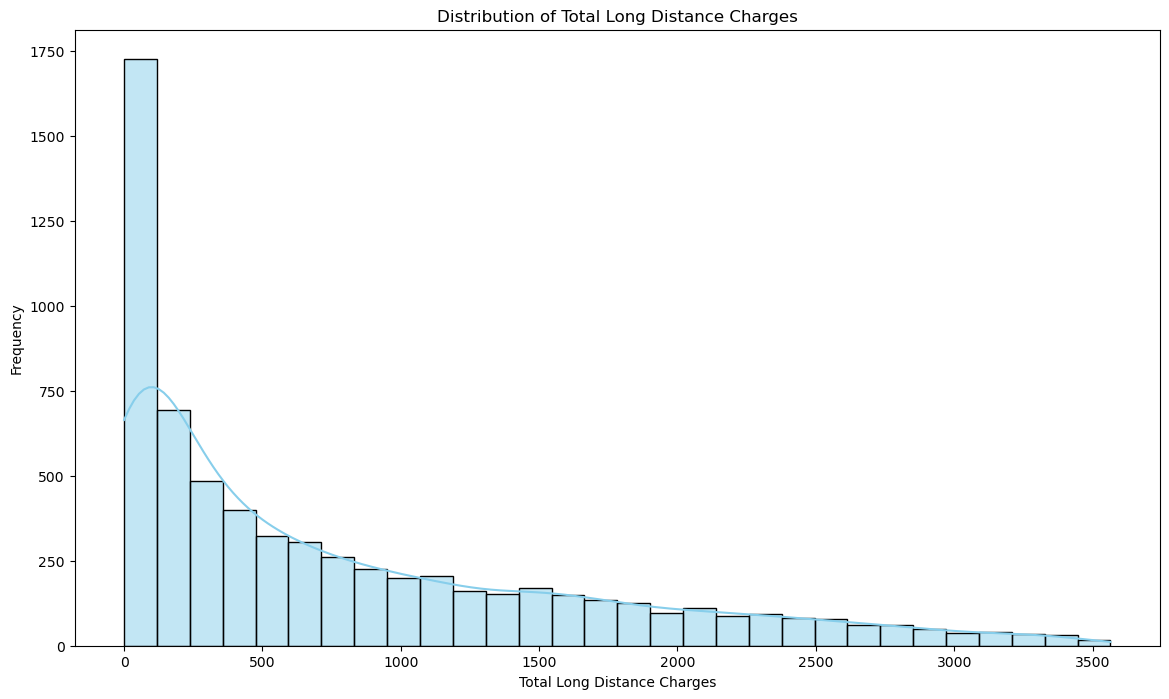

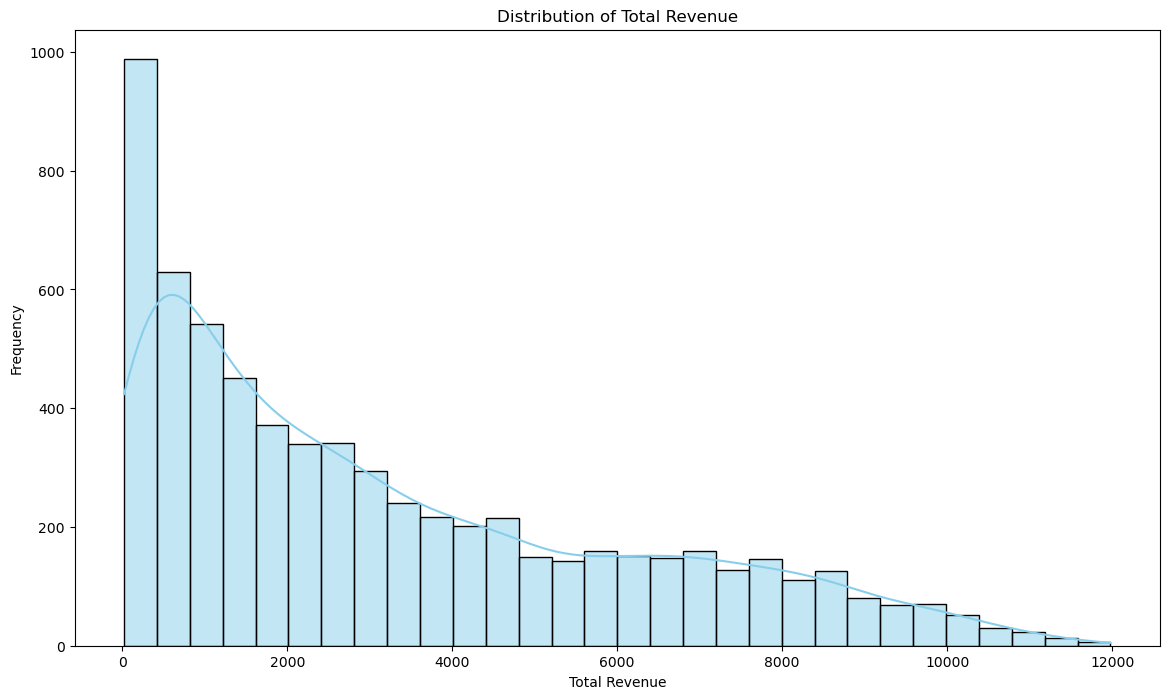

In [48]:
# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(14,8))
    sns.histplot(df_churn_clean_1[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [49]:
#Check skewness for all numerical columns
data_distribution = df_churn_clean_1[numerical_columns].skew()
print("Data Distribution:\n", data_distribution)

Data Distribution:
 Age                                  0.148507
Number of Dependents                 2.090227
Zip Code                            -0.212702
Latitude                             0.307589
Longitude                           -0.085478
Number of Referrals                  1.395613
Tenure in Months                     0.155465
Avg Monthly Long Distance Charges   -0.004774
Avg Monthly GB Download              1.180268
Monthly Charge                      -0.345761
Total Charges                        0.893414
Total Refunds                        4.186177
Total Extra Data Charges             3.978568
Total Long Distance Charges          1.158552
Total Revenue                        0.855895
dtype: float64


**Check Skewness of Numerical Columns**

In [50]:
# Create 3 empty lists to store columns based on skewness type
normal_distribution = []
right_skewed = []
left_skewed = []

# Loop through each column and classify
for col, data_skewness in data_distribution.items():
    if -0.5<(data_skewness) < 0.5:
        normal_distribution.append(col)
    elif data_skewness >= 0.5:
        right_skewed.append(col)
    elif data_skewness <= -0.5:
        left_skewed.append(col)

# Display the categorized results
print("Data Distribution Summary\n")


print("Normal Distribution Columns (Use MEAN):")
print(normal_distribution, "\n")

print("Right-Skewed Columns (Use MEDIAN):")
print(right_skewed, "\n")

print("Left-Skewed Columns (Use MEDIAN):")
print(left_skewed)

#col → represents the column name (string key).
#data_skewness → represents the numeric skewness value for that column.

Data Distribution Summary

Normal Distribution Columns (Use MEAN):
['Age', 'Zip Code', 'Latitude', 'Longitude', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Monthly Charge'] 

Right-Skewed Columns (Use MEDIAN):
['Number of Dependents', 'Number of Referrals', 'Avg Monthly GB Download', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue'] 

Left-Skewed Columns (Use MEDIAN):
[]


In [51]:
df_churn_clean_1.shape

(6589, 34)

**Filling Numerical missing values with mean**

In [52]:
# Numerical columns
for col in numerical_columns:
    if df_churn_clean_1[col].isnull().sum() > 0:
        df_churn_clean_1[col] = df_churn_clean_1[col].fillna(df_churn_clean_1[col].mean())
# If there are any missing values in a numerical column in this dataset, they should be filled with the median of that specific column.

**Filling Categorical missing values with mode**

In [53]:
# Categorical columns
for col in categorical_columns:
    if df_churn_clean_1[col].isnull().sum() > 0:
        df_churn_clean_1[col] = df_churn_clean_1[col].fillna(df_churn_clean_1[col].mode()[0])
# If there are any missing values in a categorical column in this dataset, they should be filled with the mode of that specific column.

In [54]:
total_missing_values = df_churn_clean_1.isnull().sum().sum()
print(f"Total Missing Values: {total_missing_values}. Now we can do the encoding..")


Total Missing Values: 0. Now we can do the encoding..


In [55]:
df_churn_clean_1.head(10)

,Gender,Age,Married,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Phone Service,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Age Group
0,Female,37,Yes,0,93225,34.827662,-118.999073,2,9,Yes,...,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,Non-Senior Citizen
1,Male,46,No,0,91206,34.162515,-118.203869,0,9,Yes,...,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,Non-Senior Citizen
2,Male,50,No,0,92627,33.645672,-117.922613,0,4,Yes,...,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Senior Citizen
3,Male,78,Yes,0,94553,38.014457,-122.115432,1,13,Yes,...,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Senior Citizen
4,Female,75,Yes,0,93010,34.227846,-119.079903,3,3,Yes,...,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Senior Citizen
5,Female,23,No,3,95345,37.581496,-119.972762,0,9,Yes,...,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,Non-Senior Citizen
6,Female,67,Yes,0,93437,34.757477,-120.550507,1,71,Yes,...,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,Senior Citizen
7,Male,52,Yes,0,94558,38.489789,-122.270110,8,63,Yes,...,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,Senior Citizen
8,Female,68,No,0,93063,34.296813,-118.685703,0,7,Yes,...,Yes,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,Senior Citizen
9,Female,43,Yes,1,95681,38.984756,-121.345074,3,65,Yes,...,Yes,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,Non-Senior Citizen


**Successfully fill the missing values**

In [56]:
df_churn_clean_1.shape

(6589, 34)

## **Encode Categorical Columns**

**Machine learning models (like XGboost, Decision Tree, Random Forest, etc.) only understand numbers — not text like "Yes", "No", "Fiber Optic", or "DSL".
So we convert categorical (text) columns → numeric form. So in here we hope to use Xgboost for that and we need to convert that all categorical columns to numeric columns.**

**Split all Categorical columns into two groups**

In [57]:
# Columns with 3 categories
multi_category_cols = ['Internet Type', 'Contract', 'Payment Method']

In [58]:
# Columns with 2 categories
binary_cols = [
    'Online Security', 'Online Backup','Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing','Phone Service', 'Multiple Lines','Married', 'Gender',
    'Internet Service', 'Streaming Music', 'Unlimited Data', 'Customer Status','Age Group','Device Protection Plan','Phone Service']

**Encode the Multi category columns**

In [59]:
label_encoder = LabelEncoder()

for col in multi_category_cols:
    df_churn_clean_1[col] = label_encoder.fit_transform(df_churn_clean_1[col])
#label_encoder.fit_transform(df_churn_clean[col]) — look at the unique values in that column and map them to numbers 0,1,2.    

**Encode all binary columns automatically**

In [60]:
#Explicitly enable the future-safe behavior
pd.set_option('future.no_silent_downcasting', True)
for col in binary_cols:
    df_churn_clean_1[col] =(df_churn_clean_1[col].replace({'Yes': 1, 'No': 0,
                                                           'Churned': 1, 'Stayed': 0,
                                                           'Male': 1, 'Female': 0,
                                                          'Senior Citizen': 1, 'Non-Senior Citizen':0 
                                                          })
                                                           .astype(int))
   

**Check counts for see multi category encoding is worked or not**

In [61]:
for col in multi_category_cols:
    print(f"\n{col} value counts:")
    print(df_churn_clean_1[col].value_counts())




Internet Type value counts:
Internet Type
2    4278
1    1537
0     774
Name: count, dtype: int64

Contract value counts:
Contract
0    3202
2    1861
1    1526
Name: count, dtype: int64

Payment Method value counts:
Payment Method
0    3728
1    2518
2     343
Name: count, dtype: int64


**Check counts for see binary_cols encoding is worked or not**

In [62]:
df_churn_clean_1.head()

,Gender,Age,Married,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Phone Service,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Age Group
0,0,37,1,0,93225,34.827662,-118.999073,2,9,1,...,1,1,65.6,593.30,0.00,0,381.51,974.81,0,0
1,1,46,0,0,91206,34.162515,-118.203869,0,9,1,...,0,1,-4.0,542.40,38.33,10,96.21,610.28,0,0
2,1,50,0,0,92627,33.645672,-117.922613,0,4,1,...,1,0,73.9,280.85,0.00,0,134.60,415.45,1,1
3,1,78,1,0,94553,38.014457,-122.115432,1,13,1,...,1,0,98.0,1237.85,0.00,0,361.66,1599.51,1,1
4,0,75,1,0,93010,34.227846,-119.079903,3,3,1,...,1,1,83.9,267.40,0.00,0,22.14,289.54,1,1


In [63]:
for col in binary_cols:
    print(f"\n{col} value counts:")
    print(df_churn_clean_1[col].value_counts())


Online Security value counts:
Online Security
0    4616
1    1973
Name: count, dtype: int64

Online Backup value counts:
Online Backup
0    4214
1    2375
Name: count, dtype: int64

Premium Tech Support value counts:
Premium Tech Support
0    4592
1    1997
Name: count, dtype: int64

Streaming TV value counts:
Streaming TV
1    4002
0    2587
Name: count, dtype: int64

Streaming Movies value counts:
Streaming Movies
1    4027
0    2562
Name: count, dtype: int64

Paperless Billing value counts:
Paperless Billing
1    3974
0    2615
Name: count, dtype: int64

Phone Service value counts:
Phone Service
1    5945
0     644
Name: count, dtype: int64

Multiple Lines value counts:
Multiple Lines
0    3663
1    2926
Name: count, dtype: int64

Married value counts:
Married
1    3318
0    3271
Name: count, dtype: int64

Gender value counts:
Gender
1    3312
0    3277
Name: count, dtype: int64

Internet Service value counts:
Internet Service
1    5245
0    1344
Name: count, dtype: int64

Streamin

#### **Split Features and Target**

**In this step we split data set into Features(X) and Targets(y)**

#axis=0 means  - Vertical ↓	Rows
#axis=1	Horizontal →	Columns

In [64]:
X = df_churn_clean_1.drop('Customer Status', axis=1)#Use all columns except Customer Status to predict Customer Status.
y = df_churn_clean_1['Customer Status']


#X-Independent variable.(all features used to predict churn)
#y-Dependent Variable. (what we want to predict — customer churn status)

## **Model Training and Testing**

In [65]:
# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#test_size=0.20 - 20% of rows will be used to evaluate the model (unseen during training).


In [66]:
X_train.shape

(5271, 33)

*random_state=42 - keeps results the same every time.*

*stratify=y - makes sure both sets have the same % of churned vs non-churned customers.*

#### **Build the XGBoost Model** ##

In [67]:
# Create the model
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)


#Create a model object. 
#eval_metric='logloss' is a reliable metric for binary classification.
#xgb_model.fit(X_train, y_train) = Train the model on the training data — the model learns patterns that map features → churn label.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

**Model training is done successfully**

**Make Predictions**

In [68]:
# Predict on test data
y_pred_xgb_model = xgb_model.predict(X_test)

#Produces predicted labels (0 or 1) for each test sample

**This is the predictions.**

In [69]:
print(y_pred_xgb_model[:100])


[0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1
 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0]


## **Model Evaluvation** ##

#### **Check Accuracy of XGBoost Model**

In [70]:
#To see how many predictions are correct.
accuracy_of_xgboost = accuracy_score(y_test, y_pred_xgb_model)
print(f"XGBoost Model Accuracy is: {accuracy_of_xgboost:.4f}")


XGBoost Model Accuracy is: 0.8680


**That means the model predicted correctly for 86.80% of the customers.**

#### **Confusion Matrix**

In [71]:
#To see True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN).
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb_model)
print("Confusion Matrix for XGBoost :\n", cm)

#Matrix showing counts of true positives (TP), false positives (FP), true negatives (TN), false negatives (FN). Useful to see error types.

Confusion Matrix for XGBoost :
 [[882  62]
 [112 262]]


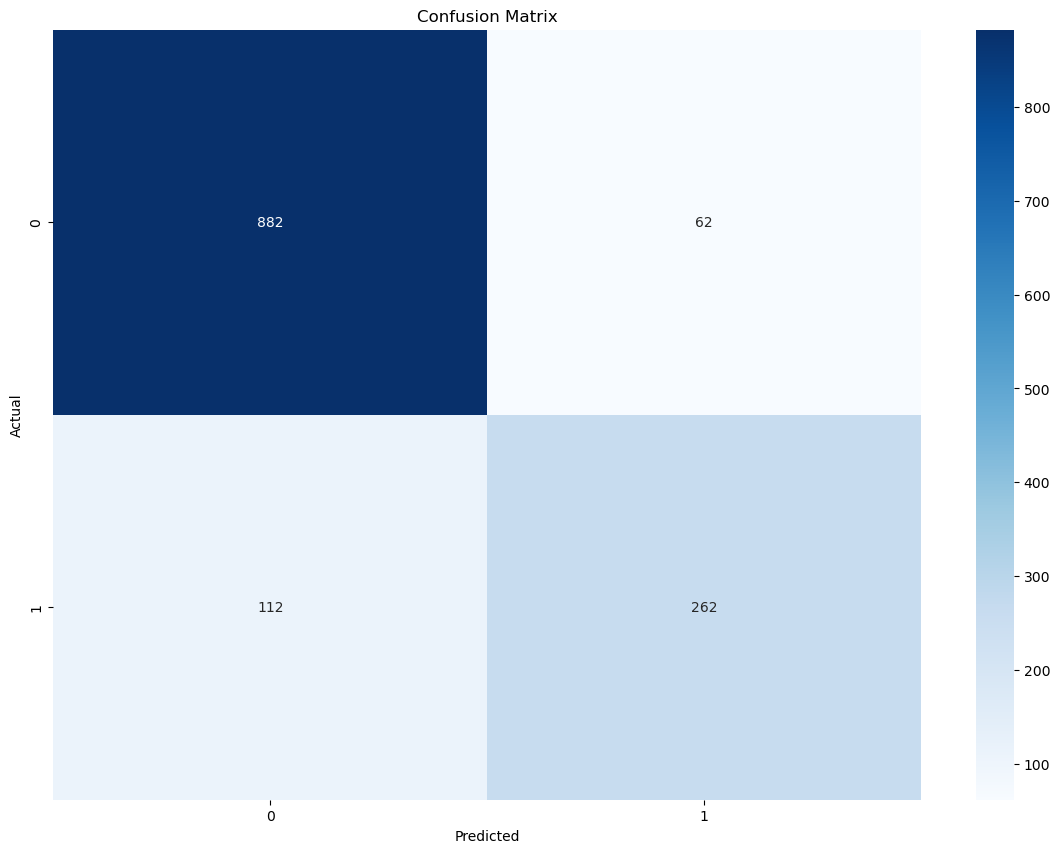

In [72]:
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#cbar=True → Displays the color scale bar on the right.
#cmap='Blues' → Defines the color scheme (you can change to 'coolwarm', 'viridis', etc.).

#### **What Each Means**

**TN (882)** = The model correctly predicted 882 customers would stay, and they actually stayed.

**FP (62)** = The model predicted 62 customers would churn, but they actually stayed.

**FN (112)** = The model predicted 112 customers would stay, but they actually churned (missed churns).

**TP (262**) = The model correctly predicted 262 customers would churn, and they actually did churn.*

#### **Classification Report**

In [73]:
#This gives precision, recall, and F1-score — used in professional reports.
from sklearn.metrics import classification_report

print("Classification Report for XGBoost:\n")
print(classification_report(y_test, y_pred_xgb_model))


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       944
           1       0.81      0.70      0.75       374

    accuracy                           0.87      1318
   macro avg       0.85      0.82      0.83      1318
weighted avg       0.86      0.87      0.86      1318



**Class 0 = Stayed**

**Precision** = 0.89 - *When the model predicted “Stayed,” it was correct 89% of the time.*

**Recall** = 0.93 -	*It correctly caught 93% of all actual stayers. (It missed 7%.)*	

**F1** = 0.91 -	*Overall, very balanced and strong performance for “Stayed.”*	

**Support** = 944 -	*There were 944 actual customers who stayed.*	


**Model is excellent at recognizing non-churners.**




**Class 1 = Churned**

**Precision** = 0.81 - *When it predicted “Churn,” it was right 81% of the time.*	

**Recall** = 0.70 -	   *It caught 70% of actual churners, meaning 30% churners were missed.*

**F1** = 0.75 -	        *A decent balance, but lower than for “Stayed.”	*

**Support** = 374 - 	*There were 374 actual churners.*	


**The model is less effective at finding churners — common in imbalanced data (because more people stay than churn).**

#### **Overall Metrics**
**Accuracy = 0.87**	- *The model was correct 87% of the time overall.*	

**Macro Avg (average of 0 and 1)** = 0.85 *precision, 0.82 recall, 0.83 F1 — equal importance to both classes.*	

**Weighted Avg (weighted by class sizes)** = 0.86 precision, 0.87 recall, 0.86 F1 — accounts for more “Stayed” customers in dataset.

#### **Feature Importance**

                 Feature  Importance
23              Contract    0.297536
8       Tenure in Months    0.097903
12      Internet Service    0.096774
3   Number of Dependents    0.094373
7    Number of Referrals    0.053845
2                Married    0.029613
21       Streaming Music    0.024122
26        Monthly Charge    0.022299
15       Online Security    0.018971
18  Premium Tech Support    0.018233


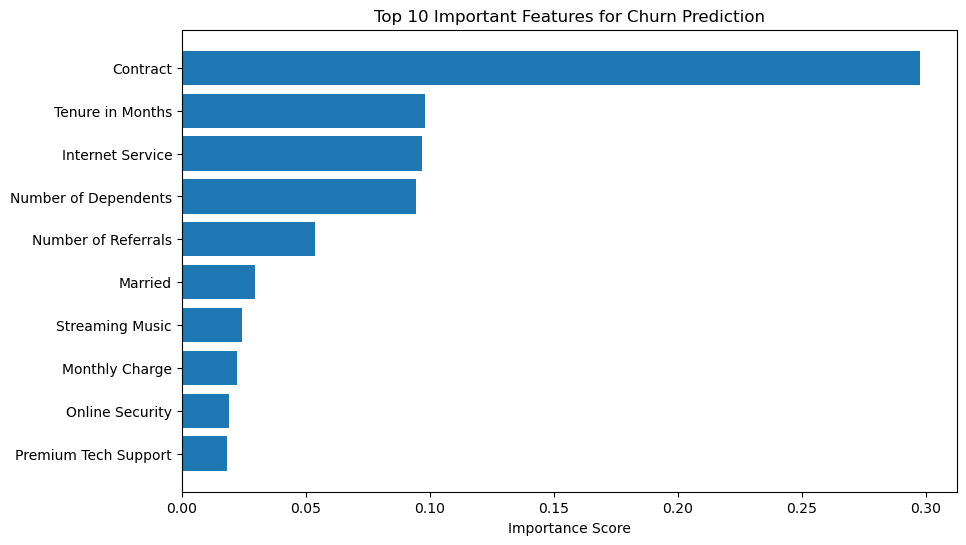

In [74]:
# Get feature importances
xgb_importances = xgb_model.feature_importances_

# Create a DataFrame for clarity
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Display top 10
print(feature_importance_df.head(10))

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features for Churn Prediction")
plt.xlabel("Importance Score")
plt.show()

**Contract = 0.297** - most powerful indicator (around 30% of model’s decision power)

**Tenure in Months = 0.097** - also quite important

**Premium Tech Support = 0.018** - not very impactful

### **Save XGBoost Model**


In [75]:
import joblib
joblib.dump(xgb_model, 'xgb_model_telecom_churn_prediction.pkl')  # saves the trained model to a file
# To load later: loaded_model = joblib.load('xgb_churn_model.pkl')

print("XGBoost model saved successfully!")


XGBoost model saved successfully!


## **Using Decision Tree Model**

#### **Import the Decision Tree Model**

**Already Done**

#### **Create and Train the Decision Tree Model**


*I already have:*

*X_train, X_test, y_train, y_test*


*from our XGBoost step — so we can reuse them.*

In [76]:
# Create the Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=42,
    criterion='gini',    # or 'entropy' (for information gain)
    max_depth=None,      # you can limit tree depth later to prevent overfitting
)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Model training is done successfully**

**Make Predictions**

In [77]:
# Make predictions on test data
y_pred_dt_model = dt_model.predict(X_test)
print(y_pred_dt_model [:100])


[1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0]


## **Model Evaluvation** ##


#### **Check Accuracy of Decision Tree Model**

In [78]:
accuracy_of_dt = accuracy_score(y_test, y_pred_dt_model)
print(f"Decision Tree Model Accuracy: {accuracy_of_dt:.4f}")

Decision Tree Model Accuracy: 0.8171


****That means the Decision Tree Model predicted correctly for 81.71% of the customers.****

#### **Confusion Matrix**

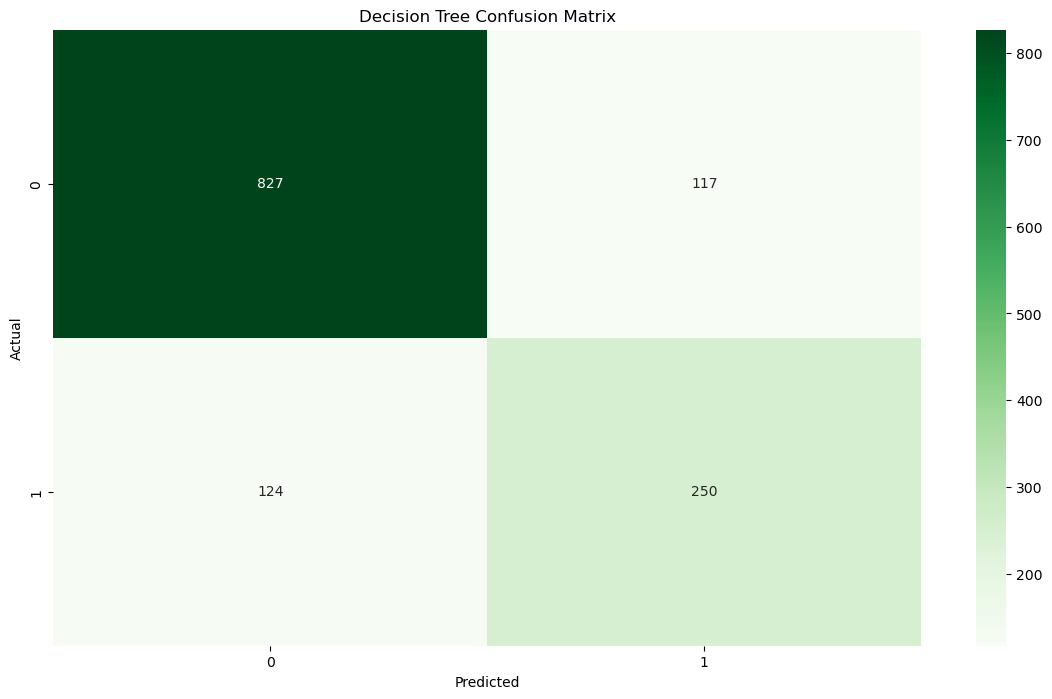

In [79]:
cm_dt = confusion_matrix(y_test, y_pred_dt_model)
plt.figure(figsize=(14,8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

#### **What Each Means**

**TN (827)** = The model correctly predicted 827 customers would stay, and they actually stayed.

**FP (117)** = The model predicted 117 customers would churn, but they actually stayed.

**FN (124)** = The model predicted 124 customers would stay, but they actually churned (missed churns).

**TP (250)** = The model correctly predicted 250 customers would churn, and they actually did churn.*

#### **Classification Report**

In [80]:
# Classification Report
print("\nDecision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt_model))


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       944
           1       0.68      0.67      0.67       374

    accuracy                           0.82      1318
   macro avg       0.78      0.77      0.77      1318
weighted avg       0.82      0.82      0.82      1318



**Class 0 = Stayed**

**Precision** = 0.87 - *When the model predicted “Stayed,” it was correct 87% of the time.*

**Recall** = 0.88 -	*It correctly caught 88% of all actual stayers. (It missed 12%.)*	

**F1** = 0.87 -	*Overall, very balanced and strong performance for “Stayed.”*	

**Support** = 944 -	*There were 944 actual customers who stayed.*	


**Model is excellent at recognizing non-churners.**




**Class 1 = Churned**

**Precision** = 0.68 - *When it predicted “Churn,” it was right 68% of the time.*	

**Recall** = 0.67 -	   *It caught 67% of actual churners, meaning 33% churners were missed.*

**F1** = 0.67 -	        *A decent balance, but lower than for “Stayed.”	*

**Support** = 374 - 	*There were 374 actual churners.*	


**The model is less effective at finding churners — common in imbalanced data (because more people stay than churn).**

#### **Overall Metrics**
**Accuracy** = 0.82	- *The model was correct 82% of the time overall.*	

**Macro Avg (average of 0 and 1)** = 0.78 *precision, 0.77 recall, 0.77 F1 — equal importance to both classes.*	

**Weighted Avg (weighted by class sizes)** = 0.82 precision, 0.82 recall, 0.82 F1 — accounts for more “Stayed” customers in dataset.

#### **Feature Importance**

**Decision trees can also show feature importance (just like XGBoost):**


Top Features (Decision Tree):
                    Feature  Importance
8          Tenure in Months    0.295625
23                 Contract    0.131560
26           Monthly Charge    0.109988
7       Number of Referrals    0.065147
1                       Age    0.061769
14  Avg Monthly GB Download    0.034932
6                 Longitude    0.034780
4                  Zip Code    0.034331
5                  Latitude    0.033531
31            Total Revenue    0.029588


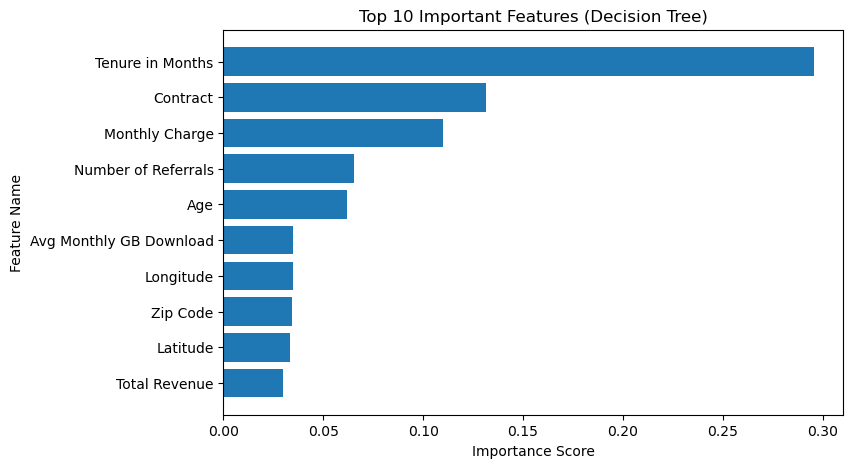

In [81]:
feature_importances_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Create a DataFrame for clarity
print("\nTop Features (Decision Tree):")
print(feature_importances_dt.head(10))

# Plot
plt.figure(figsize=(8,5))
plt.barh(feature_importances_dt['Feature'][:10], feature_importances_dt['Importance'][:10])
plt.gca().invert_yaxis()# To show the most important feature on top
plt.title('Top 10 Important Features (Decision Tree)')
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()



**Tenure in Months = 0.295** - most powerful indicator (around 30% of model’s decision power)

**Contract = 0.131** - also quite important


### **Save Decision Tree Model**

In [82]:
# Save the Decision Tree model
joblib.dump(dt_model, "decision_tree_model_telecom_churn_prediction.pkl")

print("Decision Tree model saved successfully!")

Decision Tree model saved successfully!


#### **Compare with XGBoost**

In [83]:
print(f"XGBoost Model Accuracy: {accuracy_of_xgboost:.4f}")
print(f"Decision Tree Model Accuracy: {accuracy_of_dt:.4f}")


XGBoost Model Accuracy: 0.8680
Decision Tree Model Accuracy: 0.8171


## **Using Random Forest Model**

#### **Import the Random Forest Model**

**Already Done**

#### **Create and Train the Random Forest Model**

In [84]:
# Create and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model training is done successfully**

**Make Predictions**

In [85]:
y_pred_rf_model = rf_model.predict(X_test)
print(y_pred_rf_model [:100])

[0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0]


## **Model Evaluvation** ##

#### **Check Accuracy of Random Forest Model**

In [86]:
# Evaluate performance
accuracy_of_rf = accuracy_score(y_test, y_pred_rf_model)
print(f"Random Forest Model Accuracy: {accuracy_of_rf:.4f}")

Random Forest Model Accuracy: 0.8634


****That means the Random Forest Model predicted correctly for 86.34% of the customers.****

#### **Confusion Matrix**

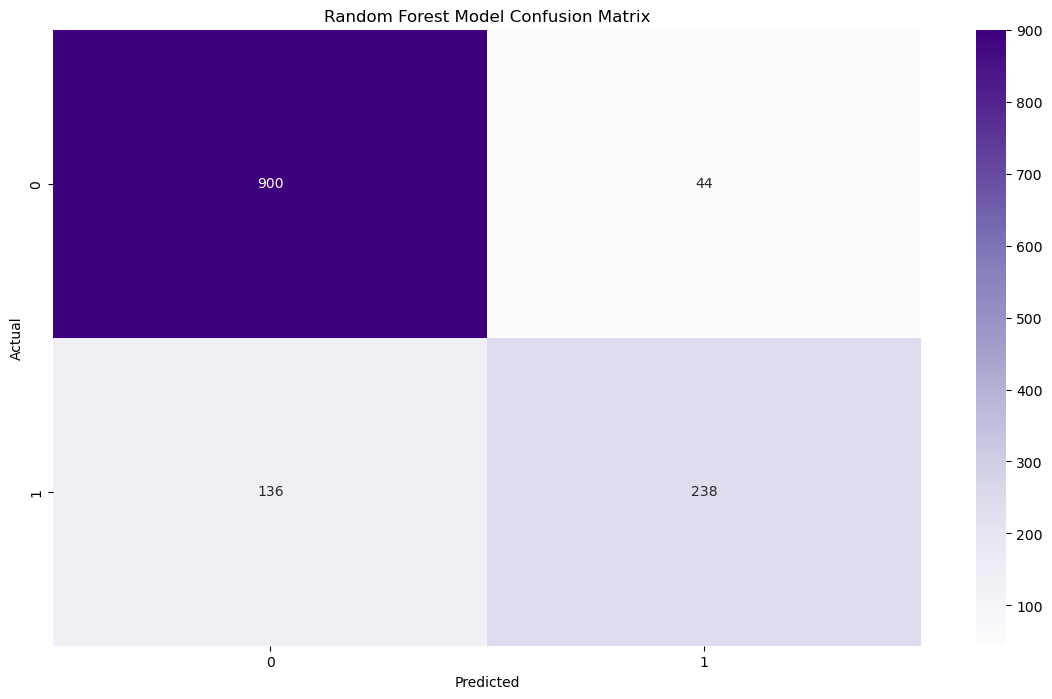

In [87]:
cm_rf = confusion_matrix(y_test, y_pred_rf_model)
plt.figure(figsize=(14,8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Model Confusion Matrix')
plt.show()

#### **What Each Means**

**TN (900)** = The model correctly predicted 900 customers would stay, and they actually stayed.

**FP (44)** = The model predicted 44 customers would churn, but they actually stayed.

**FN (136)** = The model predicted 136 customers would stay, but they actually churned (missed churns).

**TP (238)** = The model correctly predicted 238 customers would churn, and they actually did churn.*

#### **Classification Report**

In [88]:
# Classification Report
print("\nRandom Forest Model Classification Report:\n")
print(classification_report(y_test, y_pred_rf_model))


Random Forest Model Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       944
           1       0.84      0.64      0.73       374

    accuracy                           0.86      1318
   macro avg       0.86      0.79      0.82      1318
weighted avg       0.86      0.86      0.86      1318



**Class 0 = Stayed**

**Precision** = 0.87 - *When the model predicted “Stayed,” it was correct 87% of the time.*

**Recall** = 0.95 -	*It correctly caught 95% of all actual stayers. (It missed 05%.)*	

**F1** = 0.91 -	*Overall, very balanced and strong performance for “Stayed.”*	

**Support** = 944 -	*There were 944 actual customers who stayed.*	


**Model is excellent at recognizing non-churners.**




**Class 1 = Churned**

**Precision** = 0.84 - *When it predicted “Churn,” it was right 84% of the time.*	

**Recall** = 0.64 -	   *It caught 64% of actual churners, meaning 36% churners were missed.*

**F1** = 0.73 -	        *A decent balance, but lower than for “Stayed.”	*

**Support** = 374 - 	*There were 374 actual churners.*	


**The model is less effective at finding churners — common in imbalanced data (because more people stay than churn).**

#### **Overall Metrics**
**Accuracy** = 0.86	- *The model was correct 86% of the time overall.*	

**Macro Avg (average of 0 and 1)** = 0.86 *precision, 0.79 recall, 0.82 F1 — equal importance to both classes.*	

**Weighted Avg (weighted by class sizes)** = 0.86 precision, 0.86 recall, 0.826 F1 — accounts for more “Stayed” customers in dataset.

#### **Feature Importance**


Top Features (Random Forest):
                        Feature  Importance
8              Tenure in Months    0.124470
23                     Contract    0.107118
31                Total Revenue    0.093082
27                Total Charges    0.081789
26               Monthly Charge    0.076768
7           Number of Referrals    0.060527
30  Total Long Distance Charges    0.053292
1                           Age    0.045604
5                      Latitude    0.038945
6                     Longitude    0.035282


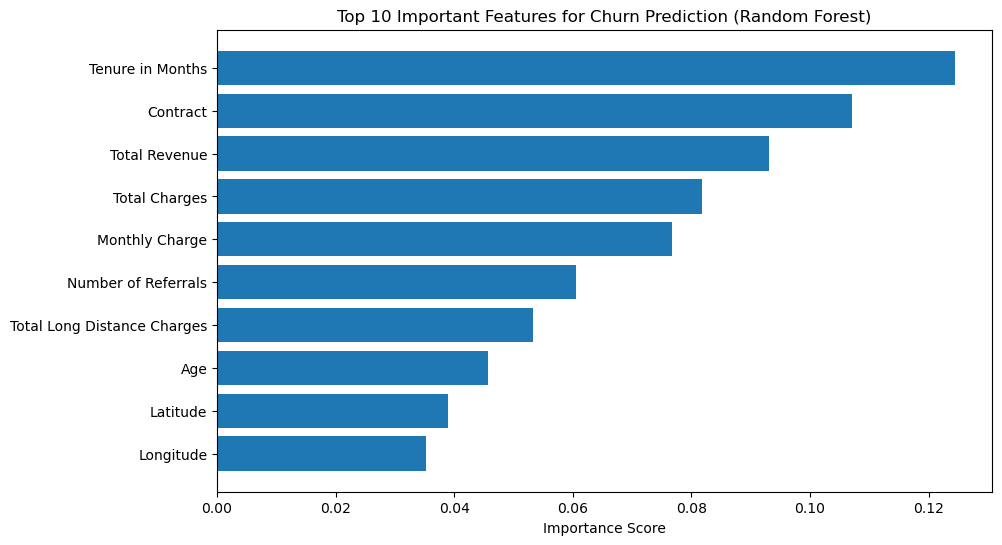

In [89]:
# Create DataFrame for feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Create a DataFrame for clarity
print("\nTop Features (Random Forest):")
print(feature_importance_rf.head(10))

# Plot top 10 important features
plt.figure(figsize=(10,6))
plt.barh(feature_importance_rf['Feature'][:10], feature_importance_rf['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features for Churn Prediction (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

**Tenure in Months = 0.1244** - most powerful indicator

**Contract = 0.1071** - also quite important


### **Save Random Forest Model**

In [90]:
# Save model
joblib.dump(rf_model, 'random_forest_model_churn_prediction.pkl')
print("Random Forest model saved successfully!")

Random Forest model saved successfully!


#### **Compare with XGBoost and Decision Tree**

In [91]:
print(f"XGBoost Model Accuracy: {accuracy_of_xgboost:.4f}")
print(f"Decision Tree Model Accuracy: {accuracy_of_dt:.4f}")
print(f"Random Forest Model Accuracy: {accuracy_of_rf:.4f}")


XGBoost Model Accuracy: 0.8680
Decision Tree Model Accuracy: 0.8171
Random Forest Model Accuracy: 0.8634


## **Using Logistic Regression Model**

#### **Import the Logistic Regression Model**

**Already Done**

#### **Create and Train the Logistic Regression Model**

In [92]:
#Create and train the Logistic Regression model
log_model = LogisticRegression(max_iter=2000, solver='liblinear')#Tells the model, “Try up to 1000 times to adjust your weights until you get the best fit for the data
log_model.fit(X_train, y_train)

#solver='liblinear' = tells Logistic Regression which mathematical method to use to find the best weights.
#Why use solver='liblinear'?
   # It handles small datasets better.
   # It often converges faster if lbfgs fails.
   # Works well for binary classification, like churn prediction (0 or 1).'''

LogisticRegression(max_iter=2000, solver='liblinear')

**Model training is done successfully**

**Make Predictions**

In [93]:
y_pred_log_model = log_model.predict(X_test)
print(y_pred_log_model )

[0 1 0 ... 1 0 1]


## **Model Evaluvation** ##

#### **Check Accuracy of Logistic Regression Model**

In [94]:
#Evaluate performance
accuracy_of_log_model = accuracy_score(y_test, y_pred_log_model)
print(f"Logistic Regression Model Accuracy: {accuracy_of_log_model:.4f}")

Logistic Regression Model Accuracy: 0.8073


#### **Confusion Matrix**

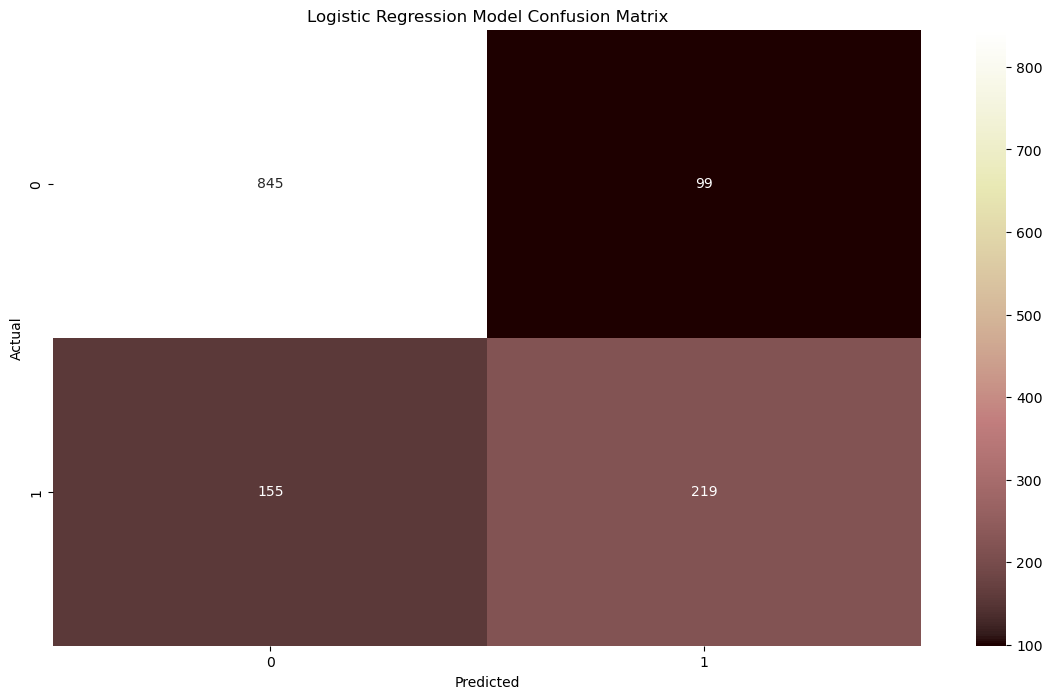

In [95]:
cm_log_model = confusion_matrix(y_test, y_pred_log_model)
plt.figure(figsize=(14,8))
sns.heatmap(cm_log_model, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Model Confusion Matrix')
plt.show()

#### **What Each Means**

**TN (845)** = The model correctly predicted 845 customers would stay, and they actually stayed.

**FP (99)** = The model predicted 99 customers would churn, but they actually stayed.

**FN (155)** = The model predicted 155 customers would stay, but they actually churned (missed churns).

**TP (219)** = The model correctly predicted 219 customers would churn, and they actually did churn.*

#### **Classification Report**

**Class 0 = Stayed**

**Precision** = 0.84 - *When the model predicted “Stayed,” it was correct 84% of the time.*

**Recall** = 0.90 -	*It correctly caught 90% of all actual stayers. (It missed 10%.)*	

**F1** = 0.87 -	*Overall, very balanced and strong performance for “Stayed.”*	

**Support** = 944 -	*There were 944 actual customers who stayed.*	


**Model is excellent at recognizing non-churners.**




**Class 1 = Churned**

**Precision** = 0.69 - *When it predicted “Churn,” it was right 69% of the time.*	

**Recall** = 0.59 -	   *It caught 59% of actual churners, meaning 41% churners were missed.*

**F1** = 0.63 -	        *lower than for “Stayed.”	*

**Support** = 374 - 	*There were 374 actual churners.*	


**The model is less effective at finding churners — common in imbalanced data (because more people stay than churn).**

#### **Overall Metrics**
**Accuracy** = 0.81	- *The model was correct 81% of the time overall.*	

**Macro Avg (average of 0 and 1)** = 0.77*precision,  0.74 recall,  0.75 F1 — Score*	

**Weighted Avg (weighted by class sizes)** = 0.80 precision, 0.81 recall, 0.08 F1 — Score.

#### **Feature Importance**

**Logistic Regression does not have** feature importances.
feature_importances_ exists in tree-based models like:
        DecisionTreeClassifier,
        RandomForestClassifier,
        XGBClassifier                                                                   

**In Logistic Regression, the “importance” of a feature is related to the absolute value of its coefficient (coef_).**

**Tree models → use feature importances**

**Logistic Regression → use coef(absolute value)**


Top Features (Logistic Regression):
                              Feature  Importance
7                 Number of Referrals    0.173727
8                    Tenure in Months    0.097864
23                           Contract    0.076121
3                Number of Dependents    0.055719
5                            Latitude    0.026142
18               Premium Tech Support    0.024903
10  Avg Monthly Long Distance Charges    0.023150
15                    Online Security    0.022791
28                      Total Refunds    0.019050
24                  Paperless Billing    0.018414


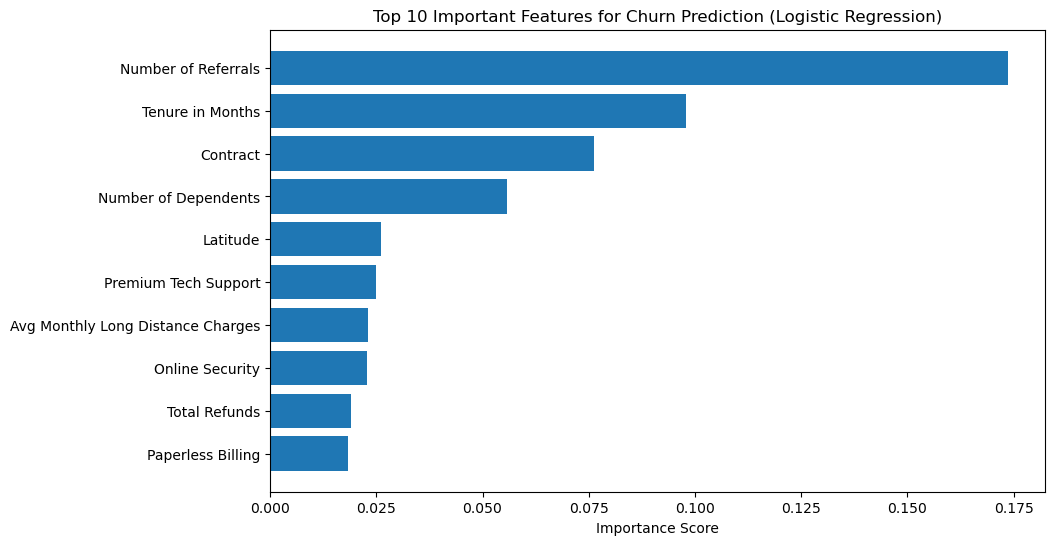

In [96]:
# Create DataFrame for feature importance
feature_importances_of_log_model = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(log_model.coef_[0])  # absolute value of coefficients
}).sort_values(by='Importance', ascending=False)

# Create a DataFrame for clarity
print("\nTop Features (Logistic Regression):")
print(feature_importances_of_log_model.head(10))

# Plot top 10 important features
plt.figure(figsize=(10,6))
plt.barh(feature_importances_of_log_model['Feature'][:10], feature_importances_of_log_model['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features for Churn Prediction (Logistic Regression)")
plt.xlabel("Importance Score")
plt.show()

#log_model.coef_ → contains the learned weights for each feature np.abs() → takes absolute value because negative values still indicate importance Sort to see the most important features first

**Number of Referrals = 0.173727**- most powerful indicator

**Tenure in Months = 0.097864** - also quite important

### **Save Logistic Regression Model**

In [97]:
# Save model
joblib.dump(rf_model, 'Logistic_Regression_model_churn_prediction.pkl')
print("Logistic Regression model saved successfully!")

Logistic Regression model saved successfully!


#### **Compare with XGBoost, Decision Tree and Logistic Regression Models**

In [98]:
print(f"XGBoost Model Accuracy: {accuracy_of_xgboost:.4f}")
print(f"Decision Tree Model Accuracy: {accuracy_of_dt:.4f}")
print(f"Random Forest Model Accuracy: {accuracy_of_rf:.4f}")
print(f"Logistic Regression Model Accuracy: {accuracy_of_log_model:.4f}")

XGBoost Model Accuracy: 0.8680
Decision Tree Model Accuracy: 0.8171
Random Forest Model Accuracy: 0.8634
Logistic Regression Model Accuracy: 0.8073


In [99]:
df_churn_clean_1.shape

(6589, 34)

## **Using Neural Network model** 

#### **Import the Neural Network Model**

In [100]:
!pip install tensorflow


#### **Scale Features**

*Neural networks behave badly when features have large differences in scale.*
                 **Some are small (age 28, tenure 4)
                   Some are huge (GB used 5300)**

*A neural network learns using weights. If one feature has values like 5000 and another has values like 5:*
                  **The model pays too much attention to the big feature
                    It learns slowly and poorly
                    Loss becomes unstable
                    Accuracy becomes low**

*So we scale features so all become like:*

**-1 to +1
     or 
   0 to 1**

*This makes the neural network learn fairly and efficiently.


In [101]:
scaler = StandardScaler()#creating an object (an instance) of StandardScaler. This object now has the ability to: Learn the scaling, Apply the scaling.
X_train_scaled = scaler.fit_transform(X_train)#Learn scale + transform training data
X_test_scaled = scaler.transform(X_test)#Apply same scale to test data

**(1).fit()**
    The scaler studies your training data. It calculates:
        Mean of each column
        Standard deviation of each column

**(2).transform()**
    After learning the statistics, it transforms the training data.

In [102]:
from tensorflow.keras.models import Sequential ## Import the MLP (Multi-Layer Perceptron) Classifier model(build the model step by step (layer by layer)).
from tensorflow.keras.layers import Input#Input is a special Keras layer that defines the shape of the input data for model.
from tensorflow.keras.layers import Dense #Import functions to check model performance
from tensorflow.keras.layers import Dropout#Regularization technique used in neural networks to prevent overfitting.

In [103]:
# Fix random seeds so results (accuracy, loss, charts) are reproducible each time I run the notebook
np.random.seed(42)      # affects Numpy random functions, like np.random.shuffle or np.random.randn.
random.seed(42)         # affects Python’s built-in random module, like random.random() or random.shuffle().
tf.random.set_seed(42)  #affects TensorFlow operations, like weight initialization in neural networks.


All three lines **“set the random seed”**. But what does that mean?

  **Computers aren’t truly random — they use pseudo-random number generators (PRNGs).**

  **Every time you generate a random number, shuffle data, or initialize neural network weights,     the computer uses a formula to produce a “random” number.**

  **If I don’t fix the seed, every time you run the notebook, the numbers will be different.         This means our model training results (accuracy, loss, weights) might be slightly different      each run.**

By setting the same seed, force the computer to generate the same sequence of random numbers every time. This makes our experiments reproducible.

#### **Rule to pick a number for seeds**

  **Pick any fixed integer as the seed**

  **Keep it consistent across runs so your results are reproducible**


#### **Create and Train the Neural Network Model**

In [104]:
#Create the Neural Network model
NN_model = Sequential()

# Add Input layer first
NN_model.add(Input(shape=(X_train_scaled.shape[1],)))

# Add hidden layers
NN_model.add(Dense(34, activation='relu'))#Add the 1st hidden layer. with 34 neurons. relu activation means: Only keep positive values, set negative values to 0. Which helps neural networks learn faster.
NN_model.add(Dropout(0.3))#Drop 30% of neurons randomly during training. And This helps prevent overfitting.

NN_model.add(Dense(34, activation='relu'))#Add another hidden layer with 34 neurons and relu again.
NN_model.add(Dropout(0.3))#Again drop 30% neurons randomly. And Prevent over-learning.

# Output layer
NN_model.add(Dense(1, activation='sigmoid'))#Final output layer. Only 1 neuron, because it's binary classification (churn or not). sigmoid outputs values between 0 and 1.

**First layer reads our data.**  
**Next layers learn patterns Dropout prevents overfitting**   
**Sigmoid outputs 0 or 1 (churn or not)**  

In [105]:
df_churn_clean_1.shape

(6589, 34)

#### **Compile the model**

In [106]:
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Adam optimizer: automatically adjusts learning rates for each weight, helps the network learn efficiently
# Loss: binary_crossentropy (because it's binary classification)
# Metrics: track accuracy


#### **Train the model**

In [107]:
training_history =  NN_model.fit(
                    X_train_scaled,        # input features for training
                    y_train,               # target labels
                    validation_split=0.3,  # keep 20% of training data for validation
                    epochs=60,             # number of times the model will see the whole training data
                    batch_size=32,         # number of samples processed before updating weights
                    verbose=1              # show training progress
                    )

Epoch 1/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6978 - loss: 0.5565 - val_accuracy: 0.7762 - val_loss: 0.4446
Epoch 2/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7848 - loss: 0.4499 - val_accuracy: 0.8186 - val_loss: 0.3997
Epoch 3/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8070 - loss: 0.4130 - val_accuracy: 0.8268 - val_loss: 0.3828
Epoch 4/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8111 - loss: 0.4071 - val_accuracy: 0.8274 - val_loss: 0.3755
Epoch 5/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8178 - loss: 0.3872 - val_accuracy: 0.8300 - val_loss: 0.3703
Epoch 6/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8260 - loss: 0.3815 - val_accuracy: 0.8312 - val_loss: 0.3646
Epoch 7/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8379 - loss: 0.3616 - val_accuracy: 0.8331 - val_loss: 0.3614
Epoch 8/60
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8349 - loss: 0.3641 - val_accuracy:

**verbose=0** - prints nothing, but the training still happens normally.

**verbose=1** - shows progress bar with loss and accuracy for each epoch.

**verbose=2** - prints one line per epoch with loss/accuracy, no progress bar.

#### **Visualize Training Progress**

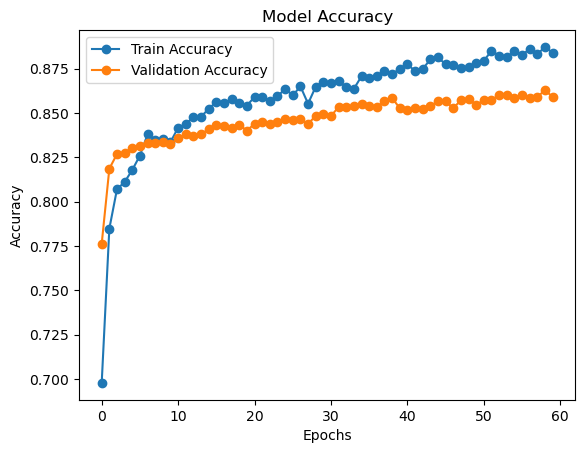

In [108]:
# Plot for training & validation accuracy
plt.plot(training_history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**If Line going up** - model is learning

**If Train accuracy much higher than validation accuracy** - model may overfit

**If Train and validation lines close together** - model is learning well and generalizing**

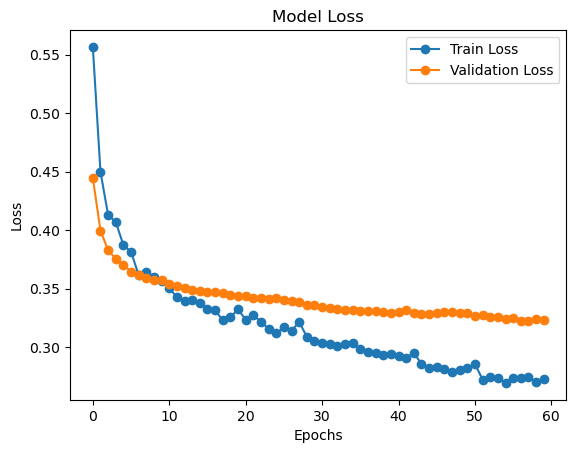

In [109]:
# Plot for training & validation loss
plt.plot(training_history.history['loss'], marker='o', label='Train Loss')
plt.plot(training_history.history['val_loss'],marker='o', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#If we only need lines without thease points, we can remove "maker = 'o'" for that.

**If Loss decreasing** - model is learning

**If Validation loss starts going up while train loss keeps decreasing** - overfitting

**If Both loss lines decrease and stay close** - good learning, no overfitting

#### **Make Predictions**

In [110]:
y_pred_prob = NN_model.predict(X_test_scaled, verbose = 0)  # Probability outputs
y_pred_class_NN_model = (y_pred_prob > 0.5).astype(int)  # Convert to class labels for binary classification
print("Actual Probabilities :\n", y_pred_prob[:5])
print("Actual Class :\n", y_pred_class_NN_model[:5])

Actual Probabilities :
 [[0.04406594]
 [0.98357975]
 [0.03457488]
 [0.6407348 ]
 [0.72793573]]
Actual Class :
 [[0]
 [1]
 [0]
 [1]
 [1]]


**In binary classification, 0.5 is the default threshold:
**y_pred_prob > 0.5** -   checks if probability is greater than 0.5.

**If yes - True (or 1)** - class 1(Churned)

**If no - False (or 0)** - class 0(Stayed)

## **Model Evaluvation** ##

#### **Check Test Accuracy and Test Loss of Neural Network Model**

**verbose=0** - evaluates silently (no progress bar).

**verbose=1** - shows a progress bar while evaluating on the test set.

**verbose=2** - prints one line per batch

In [111]:
test_loss_NN_model, test_accuracy_NN_model = NN_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy_NN_model*100:.2f}%, Test Loss: {test_loss_NN_model*100:.2f}%")


Test Accuracy: 84.83%, Test Loss: 33.68%


#### **Confusion Matrix**

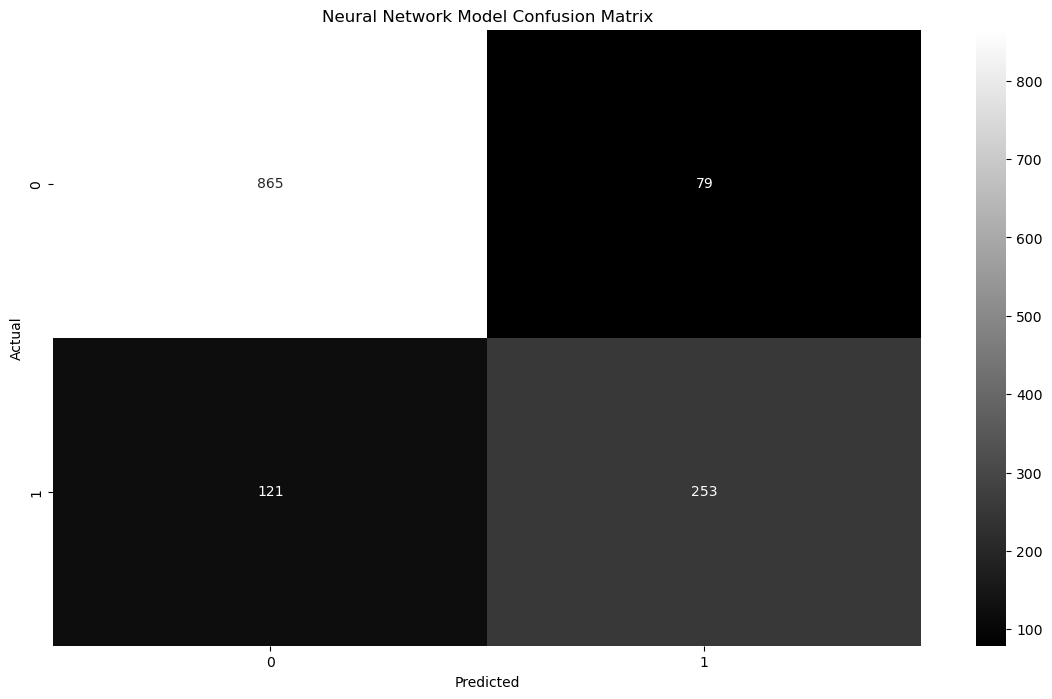

Confusion Matrix:
 [[865  79]
 [121 253]]


In [112]:
# Confusion Matrix
cm_NN_model = confusion_matrix(y_test, y_pred_class_NN_model)
plt.figure(figsize=(14,8))
sns.heatmap(cm_NN_model, annot=True, fmt='d', cmap='gray')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Model Confusion Matrix')
plt.show()
print("Confusion Matrix:\n", cm_NN_model)

#### **What Each Means**

**TN (865)** = The model correctly predicted 865 customers would stay, and they actually stayed.

**FP (79)** = The model predicted 79 customers would churn, but they actually stayed.

**FN (121)** = The model predicted 121 customers would stay, but they actually churned (missed churns).

**TP (253)** = The model correctly predicted 219 customers would churn, and they actually did churn.*

#### **Classification Report**

In [113]:
# Classification Report
cr_NN_model = classification_report(y_test, y_pred_class_NN_model)
print("Classification Report:\n", cr_NN_model)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       944
           1       0.76      0.68      0.72       374

    accuracy                           0.85      1318
   macro avg       0.82      0.80      0.81      1318
weighted avg       0.84      0.85      0.85      1318



**Class 0 = Stayed**

**Precision** = 0.88 - *When the model predicted “Stayed,” it was correct 87% of the time.*

**Recall** = 0.92 -	*It correctly caught 92% of all actual stayers. (It missed 08%.)*	

**F1** = 0.90 -	*Overall, very balanced and strong performance for “Stayed.”*	

**Support** = 944 -	*There were 944 actual customers who stayed.*	


**Model is excellent at recognizing non-churners.**




**Class 1 = Churned**

**Precision** = 0.76 - *When it predicted “Churn,” it was right 76% of the time.*	

**Recall** = 0.68 -	   *It caught 68% of actual churners, meaning 32% churners were missed.*

**F1** = 0.72 -	        *Lower than for “Stayed.”	*

**Support** = 374 - 	*There were 374 actual churners.*	


**The model is less effective at finding churners — common in imbalanced data (because more people stay than churn).**

#### **Overall Metrics**
**Accuracy** = 0.85	- *The model was correct 85% of the time overall.*	

**Macro Avg (average of 0 and 1)** = 0.82*precision,  0.80 recall,  0.81 F1 — Score*	

**Weighted Avg (weighted by class sizes)** = 0.84 precision, 0.85 recall, 0.85 F1 — Score.

#### **Feature Importance**

**Use SHAP  forFeature Importance**

In [114]:
!pip install shap


In [115]:
import shap # for get SHAP values for NN model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━

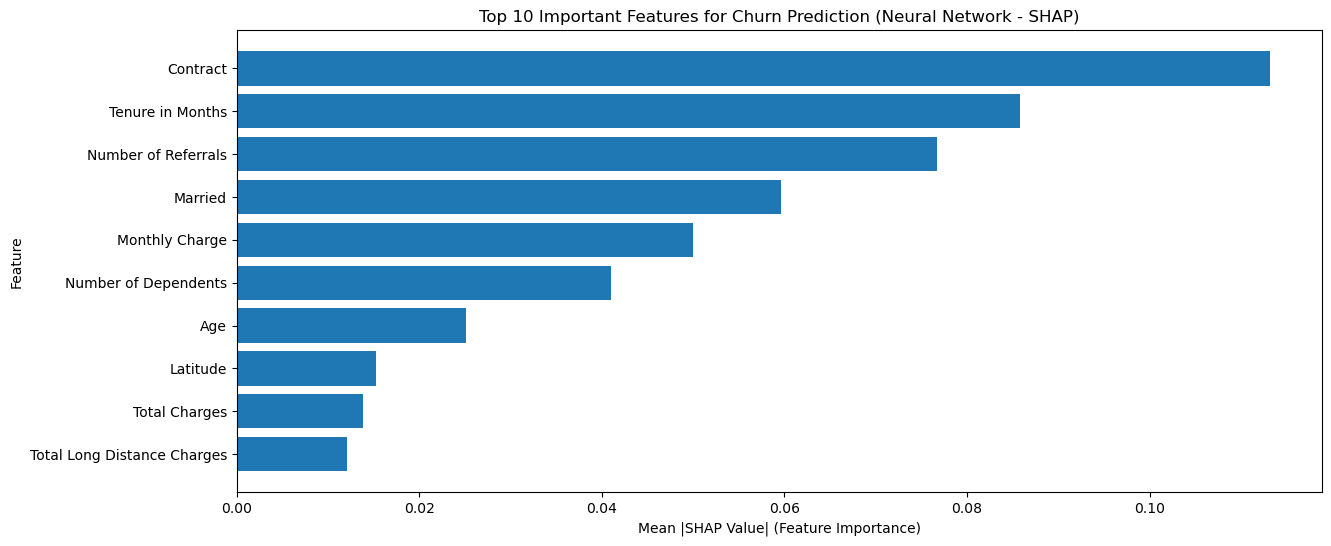

In [116]:
# Prepare background data. Pick 100 random customers from the training data to teach SHAP what normal data looks like.
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

# Define prediction function for SHAP
def predict_function(X):
    return NN_model.predict(X)

# Create KernelExplainer
explainer = shap.KernelExplainer(predict_function, background)

# Take test sample
X_test_sample = X_test_scaled[:20]#Pick the first 50 customers from test data to see which features matter most.

# Compute SHAP values (3D: samples × features × 1(output))
shap_values = explainer.shap_values(X_test_sample)
print("Original shap_values type:", type(shap_values))#calculates the SHAP value for each feature for each sample.
print("Original shap_values shape:", np.array(shap_values).shape) #(20, 33, 1)

# Ensure we have a NumPy array
shap_values = np.array(shap_values) #force to ndarray

#Remove the last dimension of size 1 - (20, 33)
if shap_values.ndim == 3 and shap_values.shape[2] == 1:
    shap_array = shap_values.squeeze(axis=2)
else:
    shap_array = shap_values  # fallback

print("shap_array ndim:", shap_array.ndim)
print("shap_array shape:", shap_array.shape)  # should be (20, 33)

##Compute mean absolute SHAP value per feature = importance(average how strongly each feature affects the prediction)
shap_importance = np.mean(np.abs(shap_values), axis=0).ravel()
print("shap_importance shape:", shap_importance.shape)  # (33,)

#Put into a DataFrame and sort by importance to ascending order
shap_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': shap_importance
}).sort_values(by='Importance', ascending=False)

print("\nTop Features (Neural Network - SHAP):")
print(shap_importance_df.head(10))

#Plot top 10 features as a horizontal bar chart
plt.figure(figsize=(14,6))
plt.barh(shap_importance_df['Feature'][:10], shap_importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features for Churn Prediction (Neural Network - SHAP)")
plt.xlabel("Mean |SHAP Value| (Feature Importance)")
plt.ylabel("Feature")
plt.show()



### **Save Neural Network  Model**

In [117]:
# Save the model in Keras native format
NN_model.save('Neural_Network_model_churn_prediction.keras')  


#### **Compare with XGBoost, Decision Tree , Logistic Regression and Neural Network Models**

In [118]:
print(f"XGBoost Model Accuracy: {accuracy_of_xgboost:.4f}")
print(f"Decision Tree Model Accuracy: {accuracy_of_dt:.4f}")
print(f"Random Forest Model Accuracy: {accuracy_of_rf:.4f}")
print(f"Logistic Regression Model Accuracy: {accuracy_of_log_model:.4f}")
print(f"Neural Networks Model Accuracy: {test_accuracy_NN_model:.4f}")

XGBoost Model Accuracy: 0.8680
Decision Tree Model Accuracy: 0.8171
Random Forest Model Accuracy: 0.8634
Logistic Regression Model Accuracy: 0.8073
Neural Networks Model Accuracy: 0.8483


#### **Summary of all models acuracy,precision,recall and F1 score.** 

In [119]:
models_reports = {
    "XGBoost": classification_report(y_test, y_pred_xgb_model, output_dict=True),
    "Decision Tree": classification_report(y_test, y_pred_dt_model, output_dict=True),
    "Random Forest": classification_report(y_test, y_pred_rf_model, output_dict=True),
    "Logistic Regression": classification_report(y_test, y_pred_log_model, output_dict=True),
     "Neural Network": classification_report(y_test, y_pred_class_NN_model, output_dict=True),
}

rows = []

for model_name, rep in models_reports.items():
    df_rep = pd.DataFrame(rep).T
    # we don't even use 'support', so no need to keep it
    row = {
        "model": model_name,
        "accuracy": rep["accuracy"],  
        "precision_0": df_rep.loc["0", "precision"],
        "precision_1": df_rep.loc["1", "precision"],
        "recall_0": df_rep.loc["0", "recall"],
        "recall_1": df_rep.loc["1", "recall"],
        "f1_0": df_rep.loc["0", "f1-score"],
        "f1_1": df_rep.loc["1", "f1-score"],
    }
    rows.append(row)

summary_models = pd.DataFrame(rows).set_index("model")
display(summary_models)


,accuracy,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1
model,,,,,,,
XGBoost,0.867982,0.887324,0.808642,0.934322,0.700535,0.910217,0.750716
Decision Tree,0.817147,0.869611,0.681199,0.876059,0.668449,0.872823,0.674764
Random Forest,0.863429,0.868726,0.843972,0.953390,0.636364,0.909091,0.725610
Logistic Regression,0.807284,0.845000,0.688679,0.895127,0.585561,0.869342,0.632948
Neural Network,0.848255,0.877282,0.762048,0.916314,0.676471,0.896373,0.716714
